In [ ]:
# Функция для обработки текста логов и превращения в csv с снепшотами ордербука.
import pandas as pd
from time import time

def getData(path):
    bid_prices = []
    ask_prices = []
    bid_volumes = []
    ask_volumes = []
    start_time = time()
    total = []
    columns = [f'bid_price{i}' for i in range(9, -1, -1)] + [f'bid_vol{i}' for i in range(9, -1, -1)] + [f'ask_price{i}' for i in range(10)] + [f'ask_vol{i}' for i in range(10)]
    i = 0
    bid_counter = 0
    ask_counter= 0
    # Open the file and loop over each line
    with open(path, 'r') as f:
        for line in f:
            line = line.split(' ')
            i += 1
            if i % 5000000 == 0:
                print(i, time() - start_time)
                print(datetime)
            if len(line) > 1:
                if line[0] == 'Bid':
                    price, volume = float(line[2]), float(line[4])
                    bid_prices.append(price)
                    bid_volumes.append(volume)
                elif line[0] =='Ask':
                    price, volume = float(line[2]), float(line[4])
                    ask_prices.append(price)
                    ask_volumes.append(volume)
                elif line[3] == 'OrderbookSnapshot':

                    if len(bid_prices) == 10 and len(ask_prices) == 10:
                        total.append([datetime] + bid_prices + bid_volumes + ask_prices + ask_volumes) # 10 -> 1
                    else:
                        print("less OBS: ", i, len(bid_prices), len(ask_prices))
                    datetime = line[0] + ' ' + line[1]

                    bid_prices = []
                    ask_prices = []
                    bid_volumes = []
                    ask_volumes = []
    if len(bid_prices) == 10 and len(ask_prices) == 10:
        total.append([datetime] + bid_prices + bid_volumes + ask_prices + ask_volumes) # 10 -> 1
    else:
        print("less OBS: ", i, len(bid_prices), len(ask_prices))
    return total

In [59]:
# Аналогичная функция для трейдов
import pandas as pd
from time import time


def getTrades(path):
    start_time = time()
    total = []
    datetime = ''
    columns = ['timestamp', 'side', 'price', 'volume']
    i = 0
    with open(path, 'r') as f:
        for line in f:
            line = line.split(' ')
            i += 1
            if i % 5000000 == 0:
                print(i, time() - start_time)
                print(datetime)
            if len(line) > 1:
                if line[3] == 'Trades':
#                     print(line)
                    # Еслиу нас идет сразу несколько сделок по одной стороне и одной цене то мы их группируем по объему в одну
                    if datetime == line[0] + ' ' + line[1] and side == line[16] and price == float(line[17]):
#                         print("совп. блоки")
                        volume += float(line[18])
                    else:
#                         print("Добавляем:")
                        if datetime != '':
#                             print("Final block: ", datetime, side, price,volume)
                            total.append([datetime, side, float(price), volume])
                            
                        datetime = line[0] + ' ' + line[1]
                        side = line[16]
                        price = float(line[17])
                        volume = float(line[18])
#                     if i < 1000000:
#                         print(datetime, side, price,line[18], volume)
    total.append([datetime, side, price, volume])                   
    return total

In [60]:
# xuTrades = getTrades('/kaggle/input/testtask/bitmex_XBTUSD_20230130_depth10.txt/bitmex_XBTUSD_20230130_depth10.txt')

5000000 4.999882936477661
23-01-30 01:11:39.834498
10000000 10.725641012191772
23-01-30 02:17:22.413473
15000000 16.27048420906067
23-01-30 04:07:55.231946
20000000 22.01775336265564
23-01-30 06:20:26.918319
25000000 27.585676193237305
23-01-30 08:19:11.308825
30000000 33.29723143577576
23-01-30 09:05:13.959455
35000000 38.97983980178833
23-01-30 09:25:05.096352
40000000 44.84542918205261
23-01-30 09:53:03.124023
45000000 50.56799554824829
23-01-30 10:30:10.735233
50000000 56.27726721763611
23-01-30 11:39:06.199632
55000000 62.007365226745605
23-01-30 12:02:11.852850
60000000 67.67948460578918
23-01-30 12:40:37.100670
65000000 73.40907144546509
23-01-30 13:37:44.809617
70000000 79.3374707698822
23-01-30 14:36:52.203925
75000000 85.31908011436462
23-01-30 15:17:31.912252
80000000 91.3273138999939
23-01-30 15:53:05.372777
85000000 97.34436845779419
23-01-30 16:30:13.722749
90000000 103.19010663032532
23-01-30 17:12:01.110821
95000000 109.30210876464844
23-01-30 18:03:28.274662
100000000 

In [62]:
# columns = ['timestamp', 'side', 'price', 'volume']
# xuTradesDf = pd.DataFrame(xuTrades, columns=columns)
# xuTradesDf.head()

,timestamp,side,price,volume
0,23-01-30 00:00:00.894793,Bid,23742.0,3700.0
1,23-01-30 00:00:00.943051,Ask,23743.0,5400.0
2,23-01-30 00:00:00.945756,Bid,23743.5,11500.0
3,23-01-30 00:00:00.957760,Bid,23743.5,8800.0
4,23-01-30 00:00:00.961279,Bid,23743.5,200.0


In [64]:
# xuTradesDf.tail()

,timestamp,side,price,volume
65244,23-01-30 23:59:49.380554,Ask,22809.0,100.0
65245,23-01-30 23:59:56.067263,Ask,22807.5,300.0
65246,23-01-30 23:59:58.064973,Ask,22807.5,4300.0
65247,23-01-30 23:59:58.266749,Bid,22808.0,10000.0
65248,23-01-30 23:59:59.573513,Ask,22807.5,10000.0


In [63]:
# len(xuTradesDf)

65249

In [66]:
# xuTradesDf.to_feather('xuTrades.feather')

In [1]:
# import matplotlib.pyplot as plt
# # plt.plot(np.log(xuTradesDf['volume']))
# plt.plot(xuTradesDf['price'])
# plt.show()

In [2]:
# bpTrades = getTrades('/kaggle/input/testtask/deribit_BTC-PERPETUAL_20230130_depth10.txt/deribit_BTC-PERPETUAL_20230130_depth10.txt')
# bpTradesDf = pd.DataFrame(bpTrades, columns=columns)
# bpTradesDf.to_feather('bpTrades.feather')
# print(len(bpTradesDf))
# bpTradesDf.head()

In [3]:
# total = getData('/kaggle/input/testtask/bitmex_XBTUSD_20230130_depth10.txt/bitmex_XBTUSD_20230130_depth10.txt')


In [4]:
# columns = [f'bid_price{i}' for i in range(9, -1, -1)] + [f'bid_vol{i}' for i in range(9, -1, -1)] + [f'ask_price{i}' for i in range(10)] + [f'ask_vol{i}' for i in range(10)]
# df = pd.DataFrame(total, columns=['timestamp']+columns)
# df.head()

In [ ]:
len(df)

In [ ]:
import gc
del total
gc.collect()

In [ ]:
df.memory_usage(deep=True).sum() / (1024*1024)

In [ ]:
gc.collect()

In [ ]:
columns = [f'bid_price{i}' for i in range(9, -1, -1)] + [f'bid_vol{i}' for i in range(9, -1, -1)] + [f'ask_price{i}' for i in range(10)] + [f'ask_vol{i}' for i in range(10)]
total = getData('/kaggle/input/testtask/deribit_BTC-PERPETUAL_20230130_depth10.txt/deribit_BTC-PERPETUAL_20230130_depth10.txt')
btcperp = pd.DataFrame(total, columns=['timestamp']+columns)
del total
gc.collect()
btcperp.head()

In [ ]:
bid_prices = [f'bid_price{i}' for i in range(9, -1, -1)]
bid_vols = [f'bid_vol{i}' for i in range(9, -1, -1)]

ask_prices = [f'ask_price{i}' for i in range(10)]
ask_vols = [f'ask_vol{i}' for i in range(10)]

# print(df[bid_prices + ask_prices].max().astype('float16'), df[ask_vols + bid_vols].max().astype('int32'))


In [ ]:
df[bid_prices] = df[bid_prices].astype('float32')
df[bid_vols] = df[bid_vols].astype('int32')
df[ask_prices] = df[ask_prices].astype('float32')
df[ask_vols] = df[ask_vols].astype('int32')

In [ ]:
btcperp[bid_prices] = btcperp[bid_prices].astype('float32')
btcperp[bid_vols] = btcperp[bid_vols].astype('int32')
btcperp[ask_prices] = btcperp[ask_prices].astype('float32')
btcperp[ask_vols] = btcperp[ask_vols].astype('int32')

In [ ]:
df.memory_usage(deep=True).sum() / (1024*1024)

In [ ]:
df.to_feather('xbtusd.feather')

In [ ]:
btcperp.to_feather('btcperp.feather')

In [7]:
canPrint=False
lim = 50000000
with open('/kaggle/input/testtask/deribit_BTC-PERPETUAL_20230130_depth10.txt/deribit_BTC-PERPETUAL_20230130_depth10.txt', 'r') as f:
    for i in range(1):
#         if len(line.split()) > 3 and line.split()[2] == "type:" and line.split()[3] == "Trades":
#             canPrint = True
#         elif len(line.split()) > 3 and line.split()[2] == "type:" and line.split()[3] == "OrderbookSnapshot":
#             canPrint = False
            
        line = f.readline()
#         if i > 19999900:
#         if canPrint:
#         if i > lim * 0.9999:
#             print(i, line)

In [ ]:
# with open('/kaggle/input/testtask/deribit_BTC-PERPETUAL_20230130_depth10.txt/deribit_BTC-PERPETUAL_20230130_depth10.txt', 'r') as f:
#     for i in range(30):
#         line = f.readline()
#         print(line)

# Load Data

In [2]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gc

bid_prices = [f'bid_price{i}' for i in range(10)]
bid_vols = [f'bid_vol{i}' for i in range(10)]

ask_prices = [f'ask_price{i}' for i in range(10)]
ask_vols = [f'ask_vol{i}' for i in range(10)]

xu = pd.read_feather('/kaggle/input/testtask2/xbtusd.feather')
bp = pd.read_feather('/kaggle/input/testtask2/btcperp.feather')

xu[bid_prices] = xu[bid_prices[::-1]] 
xu[bid_vols] = xu[bid_vols[::-1]]

bp[bid_prices] = bp[bid_prices[::-1]] 
bp[bid_vols] = bp[bid_vols[::-1]]

xu[ask_prices] = xu[ask_prices[::-1]] 
xu[ask_vols] = xu[ask_vols[::-1]]

bp[ask_prices] = bp[ask_prices[::-1]] 
bp[ask_vols] = bp[ask_vols[::-1]]

xu['mid_price'] = (xu['bid_price0'] + xu['ask_price0']) / 2
bp['mid_price'] = (bp['bid_price0'] + bp['ask_price0']) / 2

xu['dt'] = pd.to_datetime(xu['timestamp'], format='%y-%m-%d %H:%M:%S.%f')
bp['dt'] = pd.to_datetime(bp['timestamp'], format='%y-%m-%d %H:%M:%S.%f')

xu['timestamp'] = xu['dt'].astype('int64') // 10**6
bp['timestamp'] = bp['dt'].astype('int64') // 10**6

xu.set_index('dt', inplace=True)
bp.set_index('dt', inplace=True)

a = pd.merge_asof(xu['mid_price'], xu['mid_price'].shift(1, freq='100ms'), left_index=True, right_index=True)
xu['log_return'] = np.log(a['mid_price_x']/a['mid_price_y'])
xu['log_return'].sample(15)

CPU times: user 2min 15s, sys: 21.7 s, total: 2min 37s
Wall time: 2min 28s


dt
2023-01-30 19:58:52.293236    0.000000
2023-01-30 10:08:08.136911    0.000043
2023-01-30 20:54:50.582724    0.000000
2023-01-30 15:32:52.536835    0.000000
2023-01-30 12:01:06.173419    0.000109
2023-01-30 19:42:51.566039    0.000000
2023-01-30 02:25:17.313631    0.000000
2023-01-30 21:59:22.395284    0.000000
2023-01-30 07:49:45.403178   -0.000063
2023-01-30 09:20:52.800913    0.000000
2023-01-30 12:34:58.293722    0.000000
2023-01-30 21:32:49.121963    0.000000
2023-01-30 10:05:16.520360    0.000000
2023-01-30 23:00:21.887526    0.000000
2023-01-30 15:38:16.604934    0.000000
Name: log_return, dtype: float32

In [24]:
a

,mid_price_x,mid_price_y
dt,,
2023-01-30 00:00:00.242707,23742.75,NaN
2023-01-30 00:00:00.242717,23742.00,NaN
2023-01-30 00:00:00.243175,23740.75,NaN
2023-01-30 00:00:00.246602,23740.75,NaN
2023-01-30 00:00:00.251949,23740.75,NaN
...,...,...
2023-01-30 23:59:59.751493,22807.75,22807.75
2023-01-30 23:59:59.751551,22807.75,22807.75
2023-01-30 23:59:59.751851,22807.75,22807.75


In [25]:
y = np.sign(-xu['mid_price'] + pd.Series(xu['mid_price'], xu.index).asof(xu.index + pd.Timedelta('50ms')).to_numpy()).astype('int8')
y.isna().sum()

0

In [28]:
metric(y,y)

1851.9669489491437

In [30]:
tb = int(0.7 * len(y))
vb = int(0.15 * len(y))
print(metric(y,y))
print(metric(y[:tb],y[:tb]))
print(metric(y[tb:tb+vb],y[tb:tb+vb]))
print(metric(y[-vb:],y[-vb:]))

1851.9669489491437
1484.771894938748
842.6001958224315
717.8153731984291


In [16]:
len(xu)

6042551

In [17]:
metric(y, y)

41.8

In [ ]:
xu.isna().sum()

In [6]:
# xu[ask_prices + ask_vols + bid_prices + bid_vols].sample(10)

### **Baseline on raw data, w\o Feature engineering.**

In [36]:
X.columns

Index(['timestamp_xu', 'bid_price9_xu', 'bid_price8_xu', 'bid_price7_xu',
       'bid_price6_xu', 'bid_price5_xu', 'bid_price4_xu', 'bid_price3_xu',
       'bid_price2_xu', 'bid_price1_xu', 'bid_price0_xu', 'bid_vol9_xu',
       'bid_vol8_xu', 'bid_vol7_xu', 'bid_vol6_xu', 'bid_vol5_xu',
       'bid_vol4_xu', 'bid_vol3_xu', 'bid_vol2_xu', 'bid_vol1_xu',
       'bid_vol0_xu', 'ask_price0_xu', 'ask_price1_xu', 'ask_price2_xu',
       'ask_price3_xu', 'ask_price4_xu', 'ask_price5_xu', 'ask_price6_xu',
       'ask_price7_xu', 'ask_price8_xu', 'ask_price9_xu', 'ask_vol0_xu',
       'ask_vol1_xu', 'ask_vol2_xu', 'ask_vol3_xu', 'ask_vol4_xu',
       'ask_vol5_xu', 'ask_vol6_xu', 'ask_vol7_xu', 'ask_vol8_xu',
       'ask_vol9_xu', 'mid_price_xu', 'log_return', 'timestamp_bp',
       'bid_price9_bp', 'bid_price8_bp', 'bid_price7_bp', 'bid_price6_bp',
       'bid_price5_bp', 'bid_price4_bp', 'bid_price3_bp', 'bid_price2_bp',
       'bid_price1_bp', 'bid_price0_bp', 'bid_vol9_bp', 'bid_vol8_bp',


X columns:  Index(['timestamp_xu', 'bid_price9_xu', 'bid_price8_xu', 'bid_price7_xu',
       'bid_price6_xu', 'bid_price5_xu', 'bid_price4_xu', 'bid_price3_xu',
       'bid_price2_xu', 'bid_price1_xu', 'bid_price0_xu', 'bid_vol9_xu',
       'bid_vol8_xu', 'bid_vol7_xu', 'bid_vol6_xu', 'bid_vol5_xu',
       'bid_vol4_xu', 'bid_vol3_xu', 'bid_vol2_xu', 'bid_vol1_xu',
       'bid_vol0_xu', 'ask_price0_xu', 'ask_price1_xu', 'ask_price2_xu',
       'ask_price3_xu', 'ask_price4_xu', 'ask_price5_xu', 'ask_price6_xu',
       'ask_price7_xu', 'ask_price8_xu', 'ask_price9_xu', 'ask_vol0_xu',
       'ask_vol1_xu', 'ask_vol2_xu', 'ask_vol3_xu', 'ask_vol4_xu',
       'ask_vol5_xu', 'ask_vol6_xu', 'ask_vol7_xu', 'ask_vol8_xu',
       'ask_vol9_xu', 'mid_price_xu', 'log_return', 'timestamp_bp',
       'bid_price9_bp', 'bid_price8_bp', 'bid_price7_bp', 'bid_price6_bp',
       'bid_price5_bp', 'bid_price4_bp', 'bid_price3_bp', 'bid_price2_bp',
       'bid_price1_bp', 'bid_price0_bp', 'bid_vol9_bp', 'bi

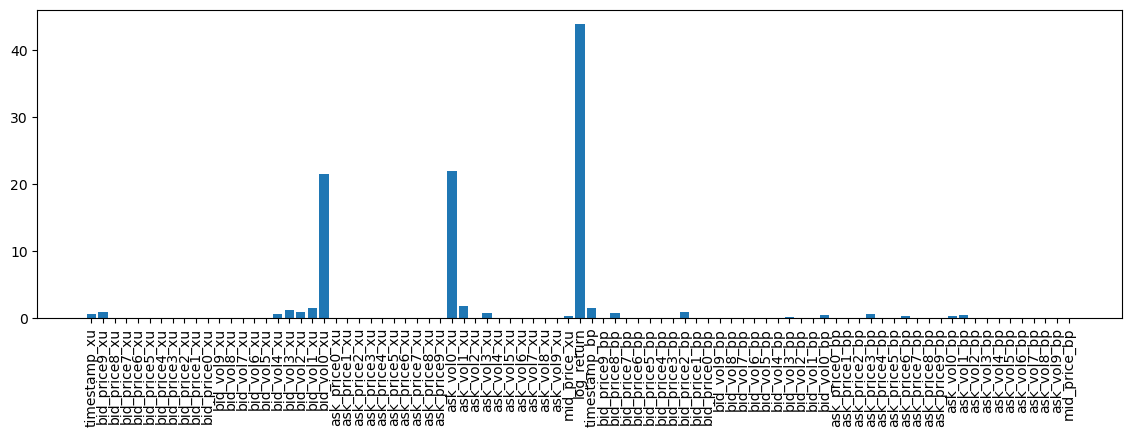

In [4]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

y = np.sign(-xu['mid_price'] + pd.Series(xu['mid_price'], xu.index).asof(xu.index + pd.Timedelta('50ms')).to_numpy()).astype('int8')
X = pd.merge_asof(xu, bp, left_index=True, right_index=True, suffixes=('_xu', '_bp'))
print("X columns: ", X.columns)
X['target'] = y
print(len(X))
features=X.columns
X.dropna(inplace=True)

def metric(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    weight_matrix = np.array([
        [1.9,     0,    -2],
        [-0.3,    0,    -0.3],
        [-2,      0,     1.9]
    ])
    
    hit_matrix = conf_matrix * weight_matrix
    hit_matrix_sum = np.sum(hit_matrix)
    action_count = np.sum(conf_matrix[:, 0]) + np.sum(conf_matrix[:, 2])
    if action_count == 0:
        return 0
    else:
        return hit_matrix_sum / np.sqrt(action_count)

scaler = StandardScaler(copy=False)
y = X['target']
X.drop(columns=['target'], inplace=True)
X.drop(columns=['log_return', 'mid_price_bp', 'mid_price_xu'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42, shuffle=False)
print(len(X_train), len(X_val), len(X_test))
# print(len(X_))
X_train = scaler.fit_transform(X_train)
X_val  = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)
test_pool = Pool(X_test, y_test)

class_weights = {
    -1: len(y_train) / (y_train==-1).sum(),
    0: len(y_train) / (y_train==0).sum(),
    1: len(y_train) / (y_train==1).sum()
}

model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
#         learning_rate=0.01, subsample=0.8,random_strength=1,max_depth=10, l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=5)# class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(14, 4))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [31]:
len(y)

6042551

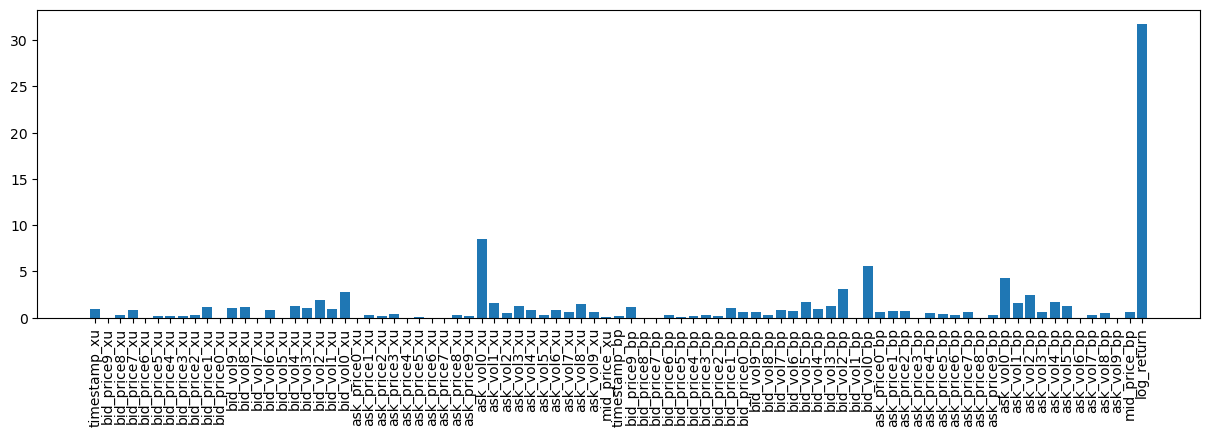

In [10]:
importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [ ]:
len(X)

X columns:  Index(['timestamp_xu', 'bid_price9_xu', 'bid_price8_xu', 'bid_price7_xu',
       'bid_price6_xu', 'bid_price5_xu', 'bid_price4_xu', 'bid_price3_xu',
       'bid_price2_xu', 'bid_price1_xu', 'bid_price0_xu', 'bid_vol9_xu',
       'bid_vol8_xu', 'bid_vol7_xu', 'bid_vol6_xu', 'bid_vol5_xu',
       'bid_vol4_xu', 'bid_vol3_xu', 'bid_vol2_xu', 'bid_vol1_xu',
       'bid_vol0_xu', 'ask_price0_xu', 'ask_price1_xu', 'ask_price2_xu',
       'ask_price3_xu', 'ask_price4_xu', 'ask_price5_xu', 'ask_price6_xu',
       'ask_price7_xu', 'ask_price8_xu', 'ask_price9_xu', 'ask_vol0_xu',
       'ask_vol1_xu', 'ask_vol2_xu', 'ask_vol3_xu', 'ask_vol4_xu',
       'ask_vol5_xu', 'ask_vol6_xu', 'ask_vol7_xu', 'ask_vol8_xu',
       'ask_vol9_xu', 'mid_price_xu', 'timestamp_bp', 'bid_price9_bp',
       'bid_price8_bp', 'bid_price7_bp', 'bid_price6_bp', 'bid_price5_bp',
       'bid_price4_bp', 'bid_price3_bp', 'bid_price2_bp', 'bid_price1_bp',
       'bid_price0_bp', 'bid_vol9_bp', 'bid_vol8_bp', 'b

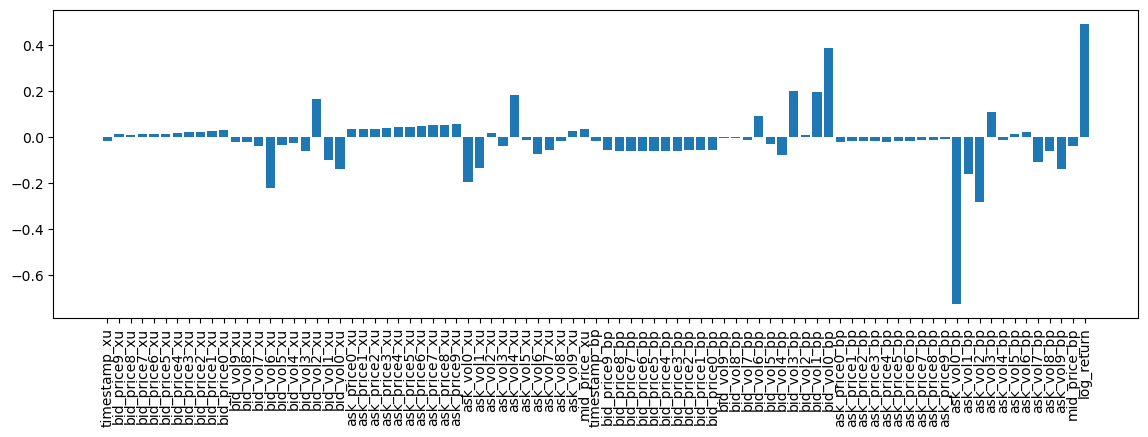

In [9]:
# from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

y = np.sign(-xu['mid_price'] + pd.Series(xu['mid_price'], xu.index).asof(xu.index + pd.Timedelta('50ms')).to_numpy()).astype('int8')
X = pd.merge_asof(xu, bp, left_index=True, right_index=True, suffixes=('_xu', '_bp'))
print("X columns: ", X.columns)
X['target'] = y
features=X.columns
X.dropna(inplace=True)

def metric(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    weight_matrix = np.array([
        [1.9,     0,    -2],
        [-0.3,    0,    -0.3],
        [-2,      0,     1.9]
    ])
    
    hit_matrix = conf_matrix * weight_matrix
    hit_matrix_sum = np.sum(hit_matrix)
    action_count = np.sum(conf_matrix[:, 0]) + np.sum(conf_matrix[:, 2])
    if action_count == 0:
        return 0
    else:
        return hit_matrix_sum / np.sqrt(action_count)

scaler = StandardScaler(copy=False)
y = X['target']
X.drop(columns=['target'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42, shuffle=False)

X_train = scaler.fit_transform(X_train)
X_val  = scaler.transform(X_val)
X_test  = scaler.transform(X_test)
# xu target + new buch of indicators from the beggining
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, max_iter=100)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

# xu target
importances = model.coef_[2]
fig, ax = plt.subplots(figsize=(14, 4))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [12]:
(y_train != 0).sum()

320

In [10]:
train_score = metric(y_train, y_train)
val_score = metric(y_val, y_val)
test_score = metric(y_test, y_test)
print("Train / Test set score: ", train_score, val_score, test_score)

Train / Test set score:  33.988233257996804 18.809040379562163 15.435672968808323


**Top3 bid\ask stds**

In [36]:
# for i in range(3):
#     for h in horizons:
#         xuTrades[f'bid{i}Std{h}'] = xuTrades[f'bid_vol{i}_{h}'].rolling(h).std().fillna(0)
#         xuTrades[f'ask{i}Std{h}'] = xuTrades[f'ask_vol{i}_{h}'].rolling(h).std().fillna(0)


### **Experimanetal Block**

In [7]:
xu['VPIN'] = 0.0
xu['VPIN2'] = 0.0


for i in range(10):
    xu['VPIN'] += np.abs(xu[ask_vols[i]] - xu[bid_vols[i]] / (i+2))
    xu['VPIN2'] += np.abs(xu[ask_vols[i]] - xu[bid_vols[i]]) / np.log(i+2)

    
xu['VPIN']  /= (xu[ask_vols].sum(axis=1) + xu[bid_vols].sum(axis=1))
xu['VPIN2']  /= (xu[ask_vols].sum(axis=1) + xu[bid_vols].sum(axis=1))

xu['VPIN'] = xu['VPIN'].astype('float32')
xu['VPIN2'] = xu['VPIN2'].astype('float32')


wap_depths = [1,2,3]
for i in wap_depths:
    xu[f'wap{i}'] = 0.
    bp[f'wap{i}'] = 0.
    for j in range(i):
        xu[f'wap{i}'] += xu[bid_vols[j]] * xu[bid_prices[j]]
        xu[f'wap{i}'] += xu[ask_vols[j]] * xu[ask_prices[j]]
        
        bp[f'wap{i}'] += bp[bid_vols[j]] * bp[bid_prices[j]]
        bp[f'wap{i}'] += bp[ask_vols[j]] * bp[ask_prices[j]]

    xu[f'wap{i}'] /= (xu[bid_vols[:i]].sum(axis=1) + xu[ask_vols[:i]].sum(axis=1))
    bp[f'wap{i}'] /= (bp[bid_vols[:i]].sum(axis=1) + bp[ask_vols[:i]].sum(axis=1))


    xu[f'wap{i}_mp_disb'] = (xu[f'wap{i}'] / xu['mid_price']).astype('float32')
    bp[f'wap{i}_mp_disb'] = (bp[f'wap{i}'] / bp['mid_price']).astype('float32')
    
    xu[f'wap{i}_mp_disb2'] = (xu[f'wap{i}'] - xu['mid_price']).astype('float32')
    bp[f'wap{i}_mp_disb2'] = (bp[f'wap{i}'] - bp['mid_price']).astype('float32')
#     print(xu[f'wap{i}'].mean(),  bp[f'wap{i}'].mean(), (xu[f'wap{i}'] / bp[f'wap{i}']).mean())
    waps = pd.merge_asof(xu[f'wap{i}'], bp[f'wap{i}'], left_index=True, right_index=True)
    
    xu[f'wap{i}_Imb'] = (waps[f'wap{i}_x'] - waps[f'wap{i}_y']).astype('float32')


   #xu[f'WMD{i}Std2000ms'] = xu[f'wap{i}'].rolling('2000ms').std().fillna(-10).astype('float16')
#     print(xu[f'WMD{i}Std2000ms'].mean(), xu[f'WMD{i}Std2000ms'].max(), xu[f'WMD{i}Std2000ms'].min(), xu[f'WMD{i}Std2000ms'].std())
del waps     
    
xu[f'wapsStdMPD'] = xu[[f'wap{i}_mp_disb' for i in wap_depths]].std(axis=1).astype('float32')
# xu[xu.columns[-15:]].sample(5)



# w = '100ms'
horizons = ['75ms', '100ms', '250ms', '500ms', '1000ms', '2000ms'] # try 50ms also if 75 will be usefull
candle = 10
xu['High'] = xu['mid_price'].rolling(candle).max().astype('float16')
xu['Low'] = xu['mid_price'].rolling(candle).min().astype('float16')
xu['Close'] = xu['wap1'].astype('float16')

#----some features from ---



#---------------------------


       
# High-Low Volatility Estimators
HLVE = np.zeros(len(xu))
HLVE2 = np.zeros(len(xu))
HtL = np.log((xu['High'] / xu['Low']))
for i in range(candle):
#     HLVE[i::10] = pd.Series(HtL[i::10]).rolling(10).mean()
    HLVE2[i::candle] = pd.Series((HtL**2)[i::candle]).rolling(candle).mean()
    
# xu['HLVE'] = HLVE.astype('float16')
xu['HLVE2'] = HLVE2.astype('float16')


# Corwin and Schultz Volatility estimator
High2bars = xu['mid_price'].rolling(2*candle).max()
Low2bars = xu['mid_price'].rolling(2*candle).min()
gamma = (np.log(High2bars / Low2bars)) ** 2
beta = ((HtL**2).shift(candle) + (HtL**2))/ 2

alpha = np.sqrt(beta) * (np.sqrt(2) - 1) / (3 - 2 * np.sqrt(2)) - np.sqrt(gamma / (3 - 2 * np.sqrt(2)))

xu['CSVE'] = 2 * (np.exp(alpha) - 1) / (1 + np.exp(alpha)).astype('float32') # Good!

# Corwin and Schultz Volatility estimator
High2bars = xu['mid_price'].rolling(candle).max()
Low2bars = xu['mid_price'].rolling(candle).min()
gamma = (np.log(High2bars / Low2bars)) ** 2
beta = ((HtL**2).shift(candle) + (HtL**2))/ 2

alpha = np.sqrt(beta) * (np.sqrt(2) - 1) / (3 - 2 * np.sqrt(2)) - np.sqrt(gamma / (3 - 2 * np.sqrt(2)))

xu['CSVE2'] = 2 * (np.exp(alpha) - 1) / (1 + np.exp(alpha)).astype('float32')

#Alligator indicator

# AlligatorJaw = np.zeros(len(xu))
# AlligatorTeeth = np.zeros(len(xu))
# AlligatorLips = np.zeros(len(xu))

# AlBase = (xu['High'] + xu['Low']) / 2
# for i in range(10):
#     AlligatorJaw[i::candle] = AlBase[i::candle].rolling(13).mean()
#     AlligatorTeeth[i::candle] = AlBase[i::candle].rolling(8).mean()
#     AlligatorLips[i::candle] = AlBase[i::candle].rolling(5).mean()
    
# xu['AlligatorJaw'] = AlligatorJaw.astype('float16')
# xu['AlligatorTeeth'] = AlligatorTeeth.astype('float16')
# xu['AlligatorLips'] = (AlligatorJaw / AlligatorLips).astype('float32')

M = (xu['High'] + xu['Low']) / 2
APO = np.zeros(len(xu))

for i in range(candle):
    APO[i::candle] = (M[i::candle].ewm(5).mean() - M[i::candle].ewm(13).mean()).astype('float16')
xu['APO'] = APO.astype('float16')

# Arron indicator

ArronUp = np.zeros(len(xu))
ArronDown = np.zeros(len(xu))

for i in range(candle):
    High20 = xu['High'][i::candle].rolling(2*candle).max()
    Low20 = xu['Low'][i::candle].rolling(2*candle).min()
    ArronUp[i::candle] = 100 * (20 - High20 / 20)
    ArronDown[i::candle] = 100 * (20 - Low20 / 20)
    
# xu['ArronUp'] = ArronUp.astype('float16')
# xu['ArronDown'] = ArronDown.astype('float16')
xu['ArronOsc'] = (ArronUp - ArronDown).astype('float16')

#Ichimoku clouds.
CL = np.zeros(len(xu))
BL = np.zeros(len(xu))
LSB = np.zeros(len(xu))
LS = np.zeros(len(xu))

for i in range(candle):
    CL[i::candle] = (xu['High'][i::candle].rolling(9).max() + xu['Low'][i::candle].rolling(9).min()) / 2
    BL[i::candle] = xu['High'][i::candle].rolling(26).max() + xu['Low'][i::candle].rolling(26).min()
    LSB[i::candle] = (xu['High'][i::candle].rolling(52).max() + xu['Low'][i::candle].rolling(52).min()) / 2

    
LSA = (CL + BL) / 2

# xu['LSA'] = LSA.astype('float16')
# xu['LSB'] = LSB.astype('float16')
# xu['ConvLine'] = CL.astype('float16')

#Double exponential moving average
M = (xu['High'] + xu['Low']) / 2
DEMA = np.zeros(len(xu))
for i in range(candle):
    DEMA[i::candle] = 2 * M[i::candle].ewm(20).mean() - M[i::candle].ewm(20).mean().ewm(20).mean()
xu['DEMA'] = DEMA.astype('float32')

# Detrended price oscillator
DPO = np.zeros(len(xu))
for i in range(10):
    DPO[i::candle] = (xu['High'][i::candle].rolling(candle).max()/12) - xu[i::candle]['mid_price'].rolling(10).mean()
xu['DPO'] = DPO.astype('float32')

# Buy \ Sell fractals

HH5 = np.zeros(len(xu))
# for i in range(candle):
#     HH5[i::candle] = xu['High'][i::candle].rolling(5).max()
    
# xu['BuyFractal'] = (
#     (xu['High'].shift(20) == HH5) & 
#     (xu['High'].shift(30) < HH5) & 
#     (xu['High'].shift(40) < HH5) & 
#     (xu['High'].shift(10) < HH5) & 
#     (xu['High'] < HH5)).astype('int8')


LL5 = np.zeros(len(xu))
# for i in range(candle):
#     LL5[i::candle] = xu['Low'][i::candle].rolling(5).min()
    
# xu['SellFractal'] = (
#     (xu['Low'].shift(20) == LL5) 
#     & (xu['Low'].shift(30) < LL5) 
#     & (xu['Low'].shift(40) < LL5)
#     & (xu['Low'].shift(10) < LL5)
#     & (xu['Low'] < LL5)).astype('int8')

xu['Open'] = xu['mid_price'].shift(10)

def upper_shadow(df):
    return df['High'] - np.maximum(df['Close'], df['Open'])

def lower_shadow(df):
    return np.minimum(df['Close'], df['Open']) - df['Low']

# ma_horizons = ['100ms', '250ms', '500ms', '1000ms', '2500ms']
# ma_horizons = [100, 200, 500, 1000, 1500, 2000]

# sma_cols = [f'SMA{mah}' for mah in ma_horizons]
# ema_cols = [f'EMA{mah}' for mah in ma_horizons]

# for mah in ma_horizons:
#     xu[f'SMA{mah}'] = xu['wap1'].rolling(mah).mean().astype('float16')
#     xu[f'EMA{mah}'] = xu.wap1.ewm(span=mah, adjust=False).mean().astype('float16')
    
#     #EMA and SMA comparison:
#     xu[f'MAC{mah}'] = (xu[f'EMA{mah}'] > xu[f'SMA{mah}']).astype('int8')

# # Count how many MA's are below or above the current price:

# xu['MAp'] = 0.
# for mah in ma_horizons:
#     xu['MAp'] += (xu[f'SMA{mah}'] > xu['wap1'])
#     xu['MAp'] += (xu[f'EMA{mah}'] > xu['wap1'])
    
# # gap between max and min MA

# xu['SMAg'] = xu[sma_cols].max(axis=1) - xu[sma_cols].min(axis=1).astype('float16')
# xu['EMAg'] = xu[ema_cols].max(axis=1) - xu[ema_cols].min(axis=1).astype('float16')
    

# xu['average'] = ((xu['High'] + xu['Low'] + xu['Close'])/3).astype('float16')
# xu['vwap'] = (xu['average'] * xu[bid_vols + ask_vols].sum(axis=1))
# xu['vwap_pct_ret'] = xu['vwap'].pct_change().astype('float32')
# xu['close_pct_ret'] = xu['Close'].pct_change().astype('float32')
# xu = xu.sort_values(by = "Date", ascending = False).reset_index(drop = True)
# xu['pvwap'] = xu['vwap_pct_ret'].shift(-1).astype('float16')

del HH5
del LL5
del DPO
del DEMA
del M
del CL
del BL
del LSB
del LS
del ArronUp
del ArronDown
del High20
del Low20
# del M
del APO
# del AlligatorJaw
# del AlligatorTeeth
# del AlligatorLips
del HLVE
del HLVE2
del High2bars
del Low2bars
del gamma
del beta
del alpha
del HtL

In [3]:
bp[bp.columns[42:]].sample(5)

,wap1,wap1_mp_disb,wap1_mp_disb2,wap2,wap2_mp_disb,wap2_mp_disb2,wap3,wap3_mp_disb,wap3_mp_disb2
dt,,,,,,,,,
2023-01-30 22:22:20.193604,22748.492041,1.000011,0.242041,22748.668781,1.000018,0.418781,22748.472739,1.000010,0.222739
2023-01-30 22:43:37.653571,22729.534564,0.999991,-0.215436,22729.243184,0.999978,-0.506816,22727.970160,0.999922,-1.779840
2023-01-30 01:40:55.339819,23666.003219,0.999990,-0.246781,23665.984640,0.999989,-0.265360,23665.323988,0.999961,-0.926012
2023-01-30 01:25:26.603513,23668.043807,0.999991,-0.206193,23668.029702,0.999991,-0.220298,23668.936436,1.000029,0.686436
2023-01-30 14:26:20.155384,23210.776608,1.000001,0.026608,23210.797037,1.000002,0.047037,23210.496509,0.999989,-0.253491


In [4]:
xu[xu.columns[42:]].sample(5)

,log_return,VPIN,VPIN2,wap1,wap1_mp_disb,wap1_mp_disb2,wap1_Imb,wap2,wap2_mp_disb,wap2_mp_disb2,...,Low,Close,HLVE2,CSVE,CSVE2,APO,ArronOsc,DEMA,DPO,Open
dt,,,,,,,,,,,,,,,,,,,,,
2023-01-30 09:41:40.615434,0.000043,0.494139,0.257225,23170.711100,0.999998,-0.038900,-12.290661,23170.382714,0.999984,-0.367286,...,23168.0,23168.0,0.0,-0.000052,0.0,-2.908325e-02,0.0,23167.304688,-21238.933594,23170.75
2023-01-30 04:30:54.557246,0.000000,0.288985,0.454037,23751.569574,0.999992,-0.180426,-16.992472,23751.435962,0.999987,-0.314038,...,23744.0,23744.0,0.0,0.000000,0.0,0.000000e+00,0.0,23744.000000,-21773.083984,23751.75
2023-01-30 19:49:17.434318,0.000000,0.573084,0.239321,22710.937583,1.000008,0.187583,-18.402119,22711.015574,1.000012,0.265574,...,22704.0,22704.0,0.0,0.000000,0.0,2.390146e-05,0.0,22704.017578,-20818.750000,22710.75
2023-01-30 09:04:32.441342,0.000000,0.414201,0.435652,23422.500364,0.999989,-0.249636,-22.115547,23422.586226,0.999993,-0.163774,...,23424.0,23424.0,0.0,0.000000,0.0,3.986816e-01,0.0,23424.701172,-21470.750000,23422.75
2023-01-30 06:44:02.509160,0.000000,0.329356,0.367921,23674.517545,0.999990,-0.232455,-17.482246,23674.470913,0.999988,-0.279087,...,23680.0,23680.0,0.0,0.000000,0.0,4.768372e-07,0.0,23680.001953,-21701.416016,23674.75


In [5]:
xu.isna().sum().sort_values()[-10:]

Low             9
APO             9
DEMA            9
Open           10
CSVE           19
CSVE2          19
log_return     62
DPO            99
HLVE2          99
ArronOsc      199
dtype: int64

**Orderbook imbalances[скип тк еще не раздебагал функцию подсчета цены взвешенной по буку. В моем варианте все работало, тут нет]**

In [3]:
ask_top5 = [f'ask_vol{i}' for i in range(5)]
bid_top5 = [f'bid_vol{i}' for i in range(5)]

def getLiquidity(df):
    bid_median = df[bid_top5].stack().median()
    ask_median = df[ask_top5].stack().median()
    
    liquidity = (bid_median + ask_median) / 2
    
    return liquidity

liq1 = getLiquidity(xu)
liq2 = getLiquidity(bp)
print(liq1, liq2)

29850.0 11000.0


In [7]:
def calculate_average_price(volume, prices, volumes):
    cum_volumes = np.cumsum(volumes)
    total_volume = np.sum(volumes)
#     print(cum_volumes.shape)
    if volume > total_volume:
        return np.dot(prices,volumes) / total_volume
    else:
        try:
            idx = np.where(cum_volumes > volume)[0][0]
        except:
            idx = len(cum_volumes)
        
        volumes[min(idx, len(volumes)-1)] = volume - cum_volumes[min(idx-1, len(cum_volumes)-1)] if idx > 0 else volume
        return np.dot(prices[:min(idx+1, len(prices))],volumes[:min(idx+1, len(volumes))]) / volume

In [5]:
%%time
ob_depth = 10

ask_avg_prices_xu = np.apply_along_axis(lambda x:  calculate_average_price(
        liq1, x[:ob_depth], x[ob_depth:]), axis=1, arr=np.hstack(
        (xu[ask_prices].to_numpy(), xu[ask_vols].to_numpy())))

# Помним что биды слева-направо у нас идут в обратном порядке, поэтому цены и объемы надо передавать реверснутыми.
bid_avg_prices_xu = np.apply_along_axis(lambda x:  calculate_average_price(
        liq1, x[:ob_depth][::-1], x[ob_depth:][::-1]), axis=1, arr=np.hstack(
        (xu[bid_prices].to_numpy(), xu[bid_vols].to_numpy())))

CPU times: user 6min 12s, sys: 944 ms, total: 6min 13s
Wall time: 6min 14s


In [17]:
calculate_average_price(xu[ask_vols], xu[ask_prices], liq1)

                            ask_vol0  ask_vol1  ask_vol2  ask_vol3  ask_vol4  \
dt                                                                             
2023-01-30 00:00:00.242707         0         0         0         0         0   
2023-01-30 00:00:00.242717         0         0         0         0         0   
2023-01-30 00:00:00.243175         0         0         0         0         0   

                            ask_vol5  ask_vol6  ask_vol7  ask_vol8  ask_vol9  
dt                                                                            
2023-01-30 00:00:00.242707         0         0         0         0         0  
2023-01-30 00:00:00.242717         0         0         0         0         0  
2023-01-30 00:00:00.243175         0         0         0         0         0  


ValueError: Shape of passed values is (6042551, 1), indices imply (6042551, 10)

In [8]:
ask_avg_prices_bp = np.apply_along_axis(lambda x:  calculate_average_price(
        liq2, x[:ob_depth], x[ob_depth:]), axis=1, arr=np.hstack(
        (bp[ask_prices].to_numpy(), bp[ask_vols].to_numpy())))

bid_avg_prices_bp = np.apply_along_axis(lambda x:  calculate_average_price(
        liq2, x[:ob_depth][::-1], x[ob_depth:][::-1]), axis=1, arr=np.hstack(
        (bp[bid_prices].to_numpy(), bp[bid_vols].to_numpy())))

In [9]:
xu['ask_imb'] = 10000 * ((ask_avg_prices_xu / xu['ask_price0']) - 1)
xu['bid_imb'] = 10000 * ((xu['bid_price0'] / bid_avg_prices_xu) - 1)
bp['ask_imb'] = 10000 * ((ask_avg_prices_bp / bp['ask_price0']) - 1)
bp['bid_imb'] = 10000 * ((bp['bid_price0'] / bid_avg_prices_bp ) - 1)

In [13]:
xu[['ask_imb', 'bid_imb']].reset_index().to_feather('OB_IMB1.feather')

In [14]:
bp[['ask_imb', 'bid_imb']].reset_index().to_feather('OB_IMB2.feather')

In [8]:
xu_imb = pd.read_feather('/kaggle/input/ob-imbs/OB_IMB1.feather')
bp_imb = pd.read_feather('/kaggle/input/ob-imbs/OB_IMB2.feather')
print(xu_imb.sample(5))

print(len(xu), len(xu_imb))
print(len(bp), len(bp_imb))

xu['ask_imb'] = xu_imb['ask_imb'].values.astype('float16')
xu['bid_imb'] = xu_imb['bid_imb'].values.astype('float16')
bp['ask_imb'] = bp_imb['ask_imb'].values.astype('float16')
bp['bid_imb'] = bp_imb['bid_imb'].values.astype('float16')

xu[['ask_imb', 'bid_imb']].sample(5)

                                dt   ask_imb   bid_imb
4741316 2023-01-30 19:19:07.309201  0.204430  1.841185
344546  2023-01-30 01:39:45.830001  0.000000  2.326713
4603260 2023-01-30 19:10:20.049847  0.148747  6.228278
47605   2023-01-30 00:11:16.311156  0.866377  1.825323
397956  2023-01-30 02:03:59.035641  0.000000  2.198544
6042551 6042551
9977985 9977985


,ask_imb,bid_imb
dt,,
2023-01-30 19:49:13.016513,0.000000,2.201172
2023-01-30 09:29:01.115814,0.000000,2.148438
2023-01-30 12:06:56.570771,0.000000,2.378906
2023-01-30 14:40:02.660069,0.000000,1.943359
2023-01-30 17:21:41.201632,0.695312,1.747070


# **Time**

In [9]:
xu['time'] = np.cos(2 * np.pi * (xu.index.hour + (xu.index.minute / 60)) / 24).astype('float16')
xu['time2'] = np.sin(2 * np.pi * (xu.index.hour + (xu.index.minute / 60)) / 24).astype('float16')
xu['time3'] = xu.index.hour* 60 + xu.index.minute
# xu['time'] = xu['time'].astype('float16')
xu['time'].sample(10)

dt
2023-01-30 15:36:59.000928   -0.587891
2023-01-30 09:01:30.452455   -0.709961
2023-01-30 17:07:26.067626   -0.229248
2023-01-30 19:56:36.734331    0.484863
2023-01-30 18:53:06.434716    0.229248
2023-01-30 21:56:50.221724    0.856934
2023-01-30 23:25:43.456692    0.988281
2023-01-30 22:00:50.351334    0.866211
2023-01-30 09:40:59.638280   -0.819336
2023-01-30 10:14:06.501232   -0.895020
Name: time, dtype: float64

In [4]:
# plt.scatter(y=xu['time'], x=xu.index)
# plt.scatter(y=xu['time2'], x=xu.index)
# plt.show()

**Trades Imbalance**

In [10]:
import pandas as pd
xuTrades = pd.read_feather('/kaggle/input/testtask2/xuTrades.feather')
xuTrades['dt'] = pd.to_datetime(xuTrades['timestamp'], format='%y-%m-%d %H:%M:%S.%f')
# xuTrades.head(1000).tail()

bpTrades = pd.read_feather('/kaggle/input/testtask2/bpTrades.feather')
bpTrades['dt'] = pd.to_datetime(bpTrades['timestamp'], format='%y-%m-%d %H:%M:%S.%f')
# bpTrades.head(1000).tail()

xuTrades.set_index('dt', inplace=True)
bpTrades.set_index('dt', inplace=True)

xuTrades['isAskVol'] = xuTrades['volume'] * (xuTrades['side']=="Ask")
xuTrades['isBidVol'] = xuTrades['volume'] * (xuTrades['side']=="Bid")

bpTrades['isAskVol'] = bpTrades['volume'] * (bpTrades['side']=="Ask")
bpTrades['isBidVol'] = bpTrades['volume'] * (bpTrades['side']=="Bid")
xuTrades.sample(10)

,timestamp,side,price,volume,isAskVol,isBidVol
dt,,,,,,
2023-01-30 08:41:54.005931,23-01-30 08:41:54.005931,Bid,23580.0,500.0,0.0,500.0
2023-01-30 09:11:34.646741,23-01-30 09:11:34.646741,Ask,23387.5,100.0,100.0,0.0
2023-01-30 19:10:03.161431,23-01-30 19:10:03.161431,Ask,22873.0,3100.0,3100.0,0.0
2023-01-30 20:21:14.593227,23-01-30 20:21:14.593227,Ask,22687.5,3000.0,3000.0,0.0
2023-01-30 05:00:31.494447,23-01-30 05:00:31.494447,Bid,23709.5,3300.0,0.0,3300.0
2023-01-30 12:47:17.007761,23-01-30 12:47:17.007761,Ask,23039.5,100.0,100.0,0.0
2023-01-30 23:54:51.329801,23-01-30 23:54:51.329801,Bid,22813.5,2700.0,0.0,2700.0
2023-01-30 16:13:09.595817,23-01-30 16:13:09.595817,Bid,23225.0,100.0,0.0,100.0
2023-01-30 01:16:16.634034,23-01-30 01:16:16.634034,Ask,23666.0,1200.0,1200.0,0.0


### Some features from 
## Mid-price prediction based on machine learning methods with technical and quantitative indicators

* ADL
* ADX
* CMO
* StochRSI
* Momentum
* Rate of change
* Realized Volatility
* Realized Kernel
* Jump Variation


In [12]:
def getIndicators(trades):
    n = 10
    # Accumulation Distribution Line
    trades['Low'] = 0.
    trades['High'] = 0.

    rolling_chunk = trades.rolling(n, min_periods=1, closed='right')
    trades['Low'] = rolling_chunk['price'].min()
    trades['High'] = rolling_chunk['price'].max()
    BlockPeriodVolume = rolling_chunk['volume'].sum()

    MFV = (((trades['price'] - trades['Low']) - \
        (trades['High'] - trades['price'])) / (trades['High'] - trades['Low'] + 1e-20)) \
        * BlockPeriodVolume 

    trades['ADL'] = 0.

    for i in range(n):
        trades['ADL'][i::10] = np.cumsum(MFV[i::10])


    # Average Directional Index
    CLprev = trades['price'].shift(n)
    trades['ADX'] = 0.0
    ADX = np.zeros(len(trades))


    DMP = pd.DataFrame((trades['High'] - trades['High'].shift(n)).values)
    DMM = pd.DataFrame((trades['Low'].shift(n) - trades['Low']).values)

        
    q1 = trades['High'] - trades['Low']
    q2 = np.abs(trades['High'] - CLprev)
    q3 = np.abs(trades['Low'] -  CLprev)

    TrueRange = pd.DataFrame(np.vstack([q1, q2, q3]).max(axis=0))

    TRI = pd.DataFrame(np.zeros(len(trades)))
    DMPI = pd.DataFrame(np.zeros(len(trades)))
    DMMI = pd.DataFrame(np.zeros(len(trades)))
    for i in range(10):
        TRI[i::10] = TrueRange.iloc[i::10].rolling(14).mean() + 1e-6
        DMPI[i::10] = DMP.iloc[i::10].rolling(14).mean()
        DMMI[i::10] = DMM.iloc[i::10].rolling(14).mean()
        
    DIP = (DMPI / TRI) * 100
    DIM = (DMMI / -TRI) * 100

    DX = ((np.abs(DIP - DIM) / (np.abs(DIP + DIM)+1e-5)) * 100)
    # print(DX.isna().sum())

    DX = pd.DataFrame(DX)

    ADX = np.zeros(DX.shape)
    for i in range(10):
        ADX[i::10] = DX.iloc[i::10].rolling(14).mean().values

    trades['ADX']=ADX

    # Change Momentum Oscillator
    Clp = trades['price'].diff(10) > 0
    Cln = trades['price'].diff(10) < 0

    Su = np.zeros(len(trades))
    Sn = np.zeros(len(trades))
    for i in range(10):
        Su[i::10]=(trades['price'].iloc[i::10] * Clp.iloc[i::10]).rolling(19).sum() 
        Sn[i::10]=(trades['price'].iloc[i::10]* Cln.iloc[i::10]).rolling(19).sum()

    CMO = 100 * (Su - Sn + 0.00001) / (Su + Sn + 0.00001)
    print(np.isnan(CMO).sum())
    CMO

    trades['CMO'] = CMO

    # Momentum
    trades['MOM'] = trades['price'].diff(10) 

    # Rate of change
    trades['ROC'] = ((trades['price'].diff(120)) / trades['price'].shift(120))*100

    # Stochastic Relative Strength Index
    CLd = trades['price'].diff(10)
    CLdu = CLd.diff(10) > 0
    CLdd = CLd.diff(10) < 0

    AG = np.zeros(len(trades))
    AL = np.zeros(len(trades))
    for i in range(10):
        AG[i::10] = (CLdu.iloc[i::10] * CLd[i::10]).rolling(14).sum()
        AL[i::10] = (CLdd.iloc[i::10] * CLd[i::10]).rolling(14).sum()

    RS = AG / (AL+1e-5)
    RSI = pd.DataFrame(100 - (100 / (RS+1e-5)))

    trades['StochRSI'] = 0.

    for i in range(10):
        RSImin = RSI[i::10].rolling(10).min()
        RSImax = RSI[i::10].rolling(10).max()
        
        trades['StochRSI'][i::10] = ((RSI[i::10] - RSImin) / (RSImax - RSImin + 1e-4)).values.reshape((-1))



    # ?? Realized Volatility

    Rt = pd.DataFrame(np.log(trades['price']).diff(10))
#     trades['RealizedVol'] = 0
#     RealizedVol = 100* np.sqrt((Rt**2).rolling(10).sum())
#     for i in range(10):
#         patch = Rt.iloc[i::10]
#         RV = 100* np.sqrt((patch**2).rolling(10).sum())
#         trades['RealizedVol'].iloc[i::10] = RV.values.reshape((-1))
    trades['RealizedVol'] = 10 * np.sqrt((Rt**2).rolling(10).sum())


    # Realized Kernel
    def kernel(x):
        return 1-3*x**2+2*x**3

    logdiff = pd.DataFrame(np.log(trades['price']).diff(10))
    H = 16
    n = 256
    K = np.zeros((len(trades),1))
    for h in range(-H,H+1,1):
        g_h = np.zeros((len(trades),1))
        k_w = kernel(h/H+1)
        for i in range(10):
            g_h[i::10] = (logdiff[i::10] * logdiff[i::10].shift(np.abs(h))).rolling(256).sum()
        K += k_w * g_h * 100

    trades['RealizedKernel'] = K


    # ?? Jump Variation
    r = np.log(trades['price']) / np.log(trades['price'].shift(10))

    BV = 3.14159 * 0.5 * (np.abs(r) * np.abs(r.shift(10))).rolling(10).sum()
    BV2 = 3.14159 * 0.5 * (np.abs(r) * np.abs(r.shift(20))).rolling(10).sum()
#     JV = np.zeros(len(trades))
#     for i in range(10):
#         BV2[i::10] = BV[i::10].rolling(10).sum()

#     JV = np.maximum(trades['RealizedVol'] - BV2, 0.)
#     trades['JumpVariationMB'] = JV
#     trades[f'JV{h}'] = np.maximum(xu[f'RV{h}']-xu[f'BVl1{h}'], 0).astype('float16')
    
    
    trades['RV_T'] = np.sqrt((r ** 2).rolling(10).sum()).astype('float16')
    trades[f'BVl1_T'] = (np.pi / 2) * (np.abs(r) * np.abs(r.shift(10))).rolling(10).sum().astype('float16')
#     trades[f'JV_T'] = np.maximum(trades['RV_T']-trades[f'BVl1_T'], 0).astype('float32')
    
    return trades.drop(columns=['High', 'Low', 'price', 'volume'])

In [13]:
xuTrades[['ADL', 'ADX', 'CMO', 'MOM', 'ROC', 'StochRSI', 'RealizedVol', 'RealizedKernel', 'RV_T', 'BVl1_T']] = getIndicators(xuTrades.copy())[['ADL', 'ADX', 'CMO', 'MOM', 'ROC', 'StochRSI', 'RealizedVol', 'RealizedKernel', 'RV_T', 'BVl1_T']].astype('float32')
xuTrades[['CMO', 'MOM', 'ROC', 'StochRSI', 'RealizedVol', 'RealizedKernel', 'RV_T', 'BVl1_T']] = xuTrades[['CMO', 'MOM', 'ROC', 'StochRSI', 'RealizedVol', 'RealizedKernel', 'RV_T', 'BVl1_T']].astype('float16')
xuTrades.sample(10)

/tmp/ipykernel_32/1865327058.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['ADL'][i::10] = np.cumsum(MFV[i::10])
/tmp/ipykernel_32/1865327058.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['StochRSI'][i::10] = ((RSI[i::10] - RSImin) / (RSImax - RSImin + 1e-4)).values.reshape((-1))


180


,timestamp,side,price,volume,isAskVol,isBidVol,ADL,ADX,CMO,MOM,ROC,StochRSI,RealizedVol,RealizedKernel,RV_T,BVl1_T
dt,,,,,,,,,,,,,,,,
2023-01-30 01:23:42.452524,23-01-30 01:23:42.452524,Ask,23640.5,52500.0,52500.0,0.0,-2930554.0,1.414767e+01,-15.765625,-9.0,0.055023,0.098755,0.010170,NaN,3.162109,15.703125
2023-01-30 22:33:19.838065,23-01-30 22:33:19.838065,Ask,22693.0,1400.0,1400.0,0.0,-39601304.0,1.823710e+07,23.078125,-7.0,0.000000,0.155151,0.004978,-0.002741,3.162109,15.703125
2023-01-30 19:10:08.588023,23-01-30 19:10:08.588023,Ask,22781.5,9600.0,9600.0,0.0,-35897764.0,1.202316e+02,12.523438,10.5,0.076904,0.854980,0.008179,0.007401,3.162109,15.703125
2023-01-30 03:12:52.607923,23-01-30 03:12:52.607923,Bid,23650.0,1800.0,0.0,1800.0,-2832919.5,1.521598e+01,11.132812,4.0,0.074036,0.000000,0.003967,-0.002438,3.162109,15.703125
2023-01-30 19:46:46.103226,23-01-30 19:46:46.103226,Bid,22701.0,16300.0,0.0,16300.0,-46509204.0,5.953476e+01,26.343750,6.0,0.094788,0.002028,0.008080,0.000998,3.162109,15.703125
2023-01-30 10:51:14.486541,23-01-30 10:51:14.486541,Bid,23214.5,900.0,0.0,900.0,-19261650.0,9.448361e+00,-52.937500,2.0,-0.088257,0.999512,0.004864,0.001934,3.162109,15.703125
2023-01-30 14:55:01.636984,23-01-30 14:55:01.636984,Ask,23218.0,29800.0,29800.0,0.0,-26814312.0,2.330811e+01,-33.312500,-7.0,-0.163452,1.000000,0.008812,-0.001019,3.162109,15.703125
2023-01-30 09:27:20.653936,23-01-30 09:27:20.653936,Bid,23233.5,1000.0,0.0,1000.0,-19725316.0,2.188211e+01,-11.101562,-0.5,-0.090332,1.000000,0.006329,0.001145,3.162109,15.703125
2023-01-30 08:35:16.107081,23-01-30 08:35:16.107081,Bid,23570.0,500.0,0.0,500.0,-7584191.5,2.827344e+01,22.234375,14.5,-0.021210,0.067261,0.011566,-0.001970,3.162109,15.703125


In [9]:
xuTrades.isna().sum()

timestamp            0
side                 0
price                0
volume               0
isAskVol             0
isBidVol             0
ADL                  0
ADX                270
CMO                180
MOM                 10
ROC                120
StochRSI           230
RealizedVol         19
RealizedKernel    2720
RV_T                19
BVl1_T              20
dtype: int64

In [10]:
# avgVol3h = xuTrades['volume'].rolling('3H').mean()
# avgVol1h = xuTrades['volume'].rolling('H').mean()
# avgVol15m = xuTrades['volume'].rolling('15min').mean()
# avgVol5m = xuTrades['volume'].rolling('5min').mean()
# avgVol1m = xuTrades['volume'].rolling('1min').mean()

# averageVol3H = xuTrades['volume'].rolling('3H').mean().astype('float16')
# averageVol1H = xuTrades['volume'].rolling('1H').mean().astype('float16')
# averageVol15m = xuTrades['volume'].rolling('15min').mean().astype('float16')
# averageVol5m = xuTrades['volume'].rolling('5min').mean().astype('float16')
# averageVol1m = xuTrades['volume'].rolling('1min').mean().astype('float16')
# averageVol100ms = xuTrades['volume'].rolling('100ms').mean().astype('float16')

# xuTrades['RelVol3H'] = (xuTrades['volume'] / averageVol3H).astype('float16')
# xuTrades['RelVol1H'] = (xuTrades['volume'] / averageVol1H).astype('float16')
# xuTrades['RelVol15m'] = (xuTrades['volume'] / averageVol15m).astype('float16')
# xuTrades['RelVol5m'] = (xuTrades['volume'] / averageVol5m).astype('float16')
# xuTrades['RelVol1m'] = (xuTrades['volume'] / averageVol1m).astype('float16')
# xuTrades['RelVol100ms'] = (xuTrades['volume'] / averageVol100ms).astype('float16')

import seaborn as sns
import matplotlib.pyplot as plt

# xuTrades['VolStd100ms'] = xuTrades['volume'].rolling('100ms').std().fillna(0).astype('float16')
# xuTrades['VolStd250ms'] = xuTrades['volume'].rolling('250ms').std().fillna(0).astype('float16')
# xuTrades['VolStd500ms'] = xuTrades['volume'].rolling('500ms').std().fillna(0).astype('float16')
# bpTrades['VolStd10000ms'] = bpTrades['volume'].rolling('10000ms').std().fillna(0).astype('float16')

# bpTrades['VolStd100ms'] = bpTrades['volume'].rolling('100ms').std().fillna(0).astype('float16')
# bpTrades['VolStd250ms'] = bpTrades['volume'].rolling('250ms').std().fillna(0).astype('float16')
# bpTrades['VolStd250ms'] = bpTrades['volume'].rolling('500ms').std().fillna(0).astype('float16')
# bpTrades['VolStd250ms'] = bpTrades['volume'].rolling('10000ms').std().fillna(0).astype('float16')

In [14]:
# horizons = ['100ms', '250ms', '500ms', '1000ms', '2000ms']
trade_horizons = horizons[:-2]

def getTradeImbalance(df, horizons):
    for h in horizons:
        BuyVol = df['isAskVol'].rolling(h).sum()
        SellVol = df['isBidVol'].rolling(h).sum()
        
        TradeFlowImb = BuyVol - SellVol
        
        df[f'TradeImb{h}'] = TradeFlowImb.astype('int32')
        
    return df[[f'TradeImb{h}' for h in horizons]]

xuTrades[[f'TradeImb{h}' for h in trade_horizons]] = getTradeImbalance(xuTrades, trade_horizons)
bpTrades[[f'TradeImb{h}' for h in trade_horizons]] = getTradeImbalance(bpTrades, trade_horizons)

xuTrades['BuyVol'] = xuTrades['isAskVol'].rolling('1000ms').sum()
xuTrades['SellVol'] = xuTrades['isBidVol'].rolling('1000ms').sum() 

bpTrades['BuyVol'] = bpTrades['isAskVol'].rolling('1000ms').sum() 
bpTrades['SellVol'] = bpTrades['isBidVol'].rolling('1000ms').sum() 


xuTrades.head(10000).tail()

,timestamp,side,price,volume,isAskVol,isBidVol,ADL,ADX,CMO,MOM,...,RealizedVol,RealizedKernel,RV_T,BVl1_T,TradeImb75ms,TradeImb100ms,TradeImb250ms,TradeImb500ms,BuyVol,SellVol
dt,,,,,,,,,,,,,,,,,,,,,
2023-01-30 08:26:10.730498,23-01-30 08:26:10.730498,Bid,23546.0,1400.0,0.0,1400.0,-3969320.75,3.805028,-57.87500,3.0,...,0.002476,0.001912,3.162109,15.703125,-1400,-1400,-1400,-6400,14000.0,60200.0
2023-01-30 08:26:10.739041,23-01-30 08:26:10.739041,Bid,23546.0,200.0,0.0,200.0,-3297243.75,3.532001,-66.68750,3.0,...,0.002752,0.002043,3.162109,15.703125,-1600,-1600,-1600,-6600,14000.0,60400.0
2023-01-30 08:26:10.739830,23-01-30 08:26:10.739830,Bid,23546.0,6100.0,0.0,6100.0,-3898359.00,3.992802,-64.68750,2.5,...,0.002951,0.001935,3.162109,15.703125,-7700,-7700,-7700,-12700,14000.0,66500.0
2023-01-30 08:26:10.744555,23-01-30 08:26:10.744555,Bid,23546.0,24400.0,0.0,24400.0,-5931838.50,4.077901,-68.43750,3.0,...,0.003206,0.001809,3.162109,15.703125,-32100,-32100,-32100,-37100,14000.0,90900.0
2023-01-30 08:26:10.779256,23-01-30 08:26:10.779256,Bid,23548.0,700.0,0.0,700.0,-8063177.00,4.000480,-57.90625,4.5,...,0.003727,0.001849,3.162109,15.703125,-32800,-32800,-32800,-42800,5000.0,91600.0


**Past Log Returns**

In [15]:
def getWeightedPrice(df, d):
    volPriceProduct = df['price'] * df['volume']
    VPProlling = volPriceProduct.rolling(d).sum()
    VolumeRolling = df['volume'].rolling(d).sum()
    weightedPrice = VPProlling / VolumeRolling
    
    return weightedPrice
    

def getPastReturns(df, d, horizons):
    weightedPrice = getWeightedPrice(df, d)
    
    for h in horizons:
#         df[f'PastRet{h}'] = (weightedPrice / weightedPrice.rolling(h).apply(lambda x: x.head(1)) - 1)
          df[f'PastRet{h}'] = np.log((weightedPrice / weightedPrice.rolling(h).apply(lambda x: x.head(1)))).astype('float16')
    return df[[f'PastRet{h}' for h in horizons]]

xuTrades[[f'PastRet{h}' for h in horizons[:-2]]] = getPastReturns(xuTrades, '100ms', horizons[:-2]).astype('float16')
bpTrades[[f'PastRet{h}' for h in horizons[:-2]]] = getPastReturns(bpTrades, '100ms', horizons[:-2]).astype('float16')

**Mean divirgences between markets**

In [16]:
s_horizons = ['75ms', '100ms', '250ms', '500ms', '1s', '5s', '9s', '19s', '38s', '75s', '150s', '300s', '600s'][:6]

def getMeanDivergence(df1, df2, d, horizons):
    
    print(weightedPrice_df1)
    
    d_prices = weightedPrice_df1 / weightedPrice_df2 
    print(d_prices.head())
    
    for h in horizons:
        df1[f'MeanDiv{h}'] = d_prices - d_prices.rolling(h).mean()
        
    return df1[[f'MeanDiv{h}' for h in horizons]]

xuTrades['weightedPrice'] = getWeightedPrice(xuTrades, '50ms')
bpTrades['weightedPrice'] = getWeightedPrice(bpTrades, '50ms')

merged = pd.merge_asof(xuTrades.reset_index(), bpTrades.reset_index(), on='dt',suffixes=("_xu", "_bp"))[['dt', 'weightedPrice_xu', 'weightedPrice_bp']]
merged.set_index('dt', inplace=True)
merged['wpDiff'] = np.log(merged['weightedPrice_xu'] / merged['weightedPrice_bp'])
for h in s_horizons:
    merged[f'DIV{h}'] = (merged['wpDiff'] - merged['wpDiff'].rolling(h).mean()).astype('float16')
# merged.head(1000).tail()

xu = pd.merge_asof(xu, merged[[f'DIV{h}' for h in s_horizons]], left_index=True, right_index=True)

xuT_features = xuTrades.columns[6:]
bpT_features = bpTrades.columns[6:]
print(xuT_features)

xu.sample(5)

Index(['ADL', 'ADX', 'CMO', 'MOM', 'ROC', 'StochRSI', 'RealizedVol',
       'RealizedKernel', 'RV_T', 'BVl1_T', 'TradeImb75ms', 'TradeImb100ms',
       'TradeImb250ms', 'TradeImb500ms', 'BuyVol', 'SellVol', 'PastRet75ms',
       'PastRet100ms', 'PastRet250ms', 'PastRet500ms', 'weightedPrice'],
      dtype='object')


,timestamp,bid_price9,bid_price8,bid_price7,bid_price6,bid_price5,bid_price4,bid_price3,bid_price2,bid_price1,...,bid_imb,time,time2,time3,DIV75ms,DIV100ms,DIV250ms,DIV500ms,DIV1s,DIV5s
dt,,,,,,,,,,,,,,,,,,,,,
2023-01-30 19:40:05.178856,1675107605178,22702.5,22703.0,22703.5,22704.0,22704.5,22705.0,22705.5,22706.5,22707.0,...,2.203125,0.422607,-0.906250,1180,6.556511e-07,6.556511e-07,6.556511e-07,8.940697e-07,8.940697e-07,0.000117
2023-01-30 02:38:40.299585,1675046320299,23592.0,23592.5,23593.0,23593.5,23594.0,23594.5,23595.0,23595.5,23596.0,...,1.907227,0.771484,0.636230,158,-1.060963e-05,-1.060963e-05,-7.909536e-05,-7.909536e-05,-7.909536e-05,-0.000097
2023-01-30 15:53:16.168766,1675093996168,23136.5,23137.0,23137.5,23138.5,23139.0,23139.5,23140.0,23141.0,23142.0,...,2.384766,-0.526367,-0.850586,953,2.950430e-05,2.950430e-05,2.950430e-05,2.950430e-05,2.950430e-05,0.000027
2023-01-30 18:51:53.450972,1675104713450,23120.5,23121.0,23121.5,23122.0,23122.5,23123.0,23123.5,23124.0,23124.5,...,1.946289,0.220703,-0.975586,1131,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2023-01-30 15:27:53.440394,1675092473440,23162.5,23163.0,23163.5,23164.0,23164.5,23165.0,23165.5,23166.0,23166.5,...,1.942383,-0.619141,-0.785156,927,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000058


In [17]:
print(xuTrades.columns[6:])
print(bpTrades.columns[6:])
print(xu.columns[41:])
print(bp.columns[41:])

Index(['ADL', 'ADX', 'CMO', 'MOM', 'ROC', 'StochRSI', 'RealizedVol',
       'RealizedKernel', 'RV_T', 'BVl1_T', 'TradeImb75ms', 'TradeImb100ms',
       'TradeImb250ms', 'TradeImb500ms', 'BuyVol', 'SellVol', 'PastRet75ms',
       'PastRet100ms', 'PastRet250ms', 'PastRet500ms', 'weightedPrice'],
      dtype='object')
Index(['TradeImb75ms', 'TradeImb100ms', 'TradeImb250ms', 'TradeImb500ms',
       'BuyVol', 'SellVol', 'PastRet75ms', 'PastRet100ms', 'PastRet250ms',
       'PastRet500ms', 'weightedPrice'],
      dtype='object')
Index(['mid_price', 'log_return', 'VPIN', 'VPIN2', 'wap1', 'wap1_mp_disb',
       'wap1_mp_disb2', 'wap1_Imb', 'wap2', 'wap2_mp_disb', 'wap2_mp_disb2',
       'wap2_Imb', 'wap3', 'wap3_mp_disb', 'wap3_mp_disb2', 'wap3_Imb',
       'wapsStdMPD', 'High', 'Low', 'Close', 'HLVE2', 'CSVE', 'CSVE2', 'APO',
       'ArronOsc', 'DEMA', 'DPO', 'Open', 'ask_imb', 'bid_imb', 'time',
       'time2', 'time3', 'DIV75ms', 'DIV100ms', 'DIV250ms', 'DIV500ms',
       'DIV1s', 'DIV5s'],

In [18]:
xu = pd.merge_asof(xu, xuTrades[xuT_features], left_index=True, right_index=True)
bp = pd.merge_asof(bp, bpTrades[bpT_features], left_index=True, right_index=True)
# bp.head()
xu.head()

,timestamp,bid_price9,bid_price8,bid_price7,bid_price6,bid_price5,bid_price4,bid_price3,bid_price2,bid_price1,...,TradeImb100ms,TradeImb250ms,TradeImb500ms,BuyVol,SellVol,PastRet75ms,PastRet100ms,PastRet250ms,PastRet500ms,weightedPrice
dt,,,,,,,,,,,,,,,,,,,,,
2023-01-30 00:00:00.242707,1675036800242,23516.5,23716.0,23717.0,23727.5,23733.0,23733.5,23734.5,23735.5,23736.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 00:00:00.242717,1675036800242,23516.5,23716.0,23717.0,23727.5,23733.0,23733.5,23734.5,23735.5,23736.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 00:00:00.243175,1675036800243,23729.5,23732.0,23733.0,23733.5,23734.0,23734.5,23736.5,23737.5,23738.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 00:00:00.246602,1675036800246,23729.5,23732.0,23733.0,23733.5,23734.0,23734.5,23736.5,23737.5,23738.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 00:00:00.251949,1675036800251,23729.5,23732.0,23733.0,23733.5,23734.0,23734.5,23736.5,23737.5,23738.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for col in xu.columns:
    print(col)

timestamp
bid_price9
bid_price8
bid_price7
bid_price6
bid_price5
bid_price4
bid_price3
bid_price2
bid_price1
bid_price0
bid_vol9
bid_vol8
bid_vol7
bid_vol6
bid_vol5
bid_vol4
bid_vol3
bid_vol2
bid_vol1
bid_vol0
ask_price0
ask_price1
ask_price2
ask_price3
ask_price4
ask_price5
ask_price6
ask_price7
ask_price8
ask_price9
ask_vol0
ask_vol1
ask_vol2
ask_vol3
ask_vol4
ask_vol5
ask_vol6
ask_vol7
ask_vol8
ask_vol9
mid_price
log_return
VPIN
VPIN2
wap1
wap1_mp_disb
wap1_mp_disb2
wap1_Imb
wap2
wap2_mp_disb
wap2_mp_disb2
wap2_Imb
wap3
wap3_mp_disb
wap3_mp_disb2
wap3_Imb
wapsStdMPD
High
Low
Close
HLVE2
CSVE
CSVE2
APO
ArronOsc
DEMA
DPO
Open
ask_imb
bid_imb
time
time2
time3
DIV75ms
DIV100ms
DIV250ms
DIV500ms
DIV1s
DIV5s
ADL
ADX
CMO
MOM
ROC
StochRSI
RealizedVol
RealizedKernel
RV_T
BVl1_T
TradeImb75ms
TradeImb100ms
TradeImb250ms
TradeImb500ms
BuyVol
SellVol
PastRet75ms
PastRet100ms
PastRet250ms
PastRet500ms
weightedPrice


In [20]:
xu.isna().sum().sort_values()[-10:]

DIV100ms             906
DIV75ms              906
RealizedVol         1015
RV_T                1015
BVl1_T              1238
ROC                11216
CMO                17469
StochRSI           23090
ADX                28434
RealizedKernel    327867
dtype: int64

**Time for best bid/ask to execute**

In [21]:
xu['AskExecTime'] = xu['ask_vol0'] / (xu['BuyVol'].rolling('10s').mean()+1e-2).astype('float32')
xu['BidExecTime'] = xu['bid_vol0'] / (xu['SellVol'].rolling('10s').mean()+1e-2).astype('float32')

bp['AskExecTime'] = bp['ask_vol0'] / (bp['BuyVol'].rolling('10s').mean()+1e-2).astype('float32')
bp['BidExecTime'] = bp['bid_vol0'] / (bp['SellVol'].rolling('10s').mean()+1e-2).astype('float32')

In [22]:
xu.drop(columns=['weightedPrice', 'BuyVol', 'SellVol', 'Open', 'High', 'Low', 'Close'], inplace=True)

In [23]:
bp.columns

Index(['timestamp', 'bid_price9', 'bid_price8', 'bid_price7', 'bid_price6',
       'bid_price5', 'bid_price4', 'bid_price3', 'bid_price2', 'bid_price1',
       'bid_price0', 'bid_vol9', 'bid_vol8', 'bid_vol7', 'bid_vol6',
       'bid_vol5', 'bid_vol4', 'bid_vol3', 'bid_vol2', 'bid_vol1', 'bid_vol0',
       'ask_price0', 'ask_price1', 'ask_price2', 'ask_price3', 'ask_price4',
       'ask_price5', 'ask_price6', 'ask_price7', 'ask_price8', 'ask_price9',
       'ask_vol0', 'ask_vol1', 'ask_vol2', 'ask_vol3', 'ask_vol4', 'ask_vol5',
       'ask_vol6', 'ask_vol7', 'ask_vol8', 'ask_vol9', 'mid_price', 'wap1',
       'wap1_mp_disb', 'wap1_mp_disb2', 'wap2', 'wap2_mp_disb',
       'wap2_mp_disb2', 'wap3', 'wap3_mp_disb', 'wap3_mp_disb2', 'ask_imb',
       'bid_imb', 'TradeImb75ms', 'TradeImb100ms', 'TradeImb250ms',
       'TradeImb500ms', 'BuyVol', 'SellVol', 'PastRet75ms', 'PastRet100ms',
       'PastRet250ms', 'PastRet500ms', 'weightedPrice', 'AskExecTime',
       'BidExecTime'],
      dtype=

In [24]:
bp.drop(columns=['BuyVol', 'SellVol'], inplace=True)

In [25]:
gc.collect()

0

**Ask / Bid volume std**

In [19]:
# xu['bvMean100ms'] = xu['bid_vol0'].rolling('1000ms').std().fillna(-1).astype('float16')
# xu['avMean100ms'] = xu['ask_vol0'].rolling('1000ms').std().fillna(-1).astype('float16')

**Arrive - cancellations frequency**

Стоит отметить что это не является точной оценкой, так как в диффе между уровнями ордербука заложены и отмены и выставлления новых ордеров, и при текущем подсчете я предполагаю что если дифф положительный то пришли новые ордера, а если отрицательный, то произошла отмена, однако понятно что за промежуток времени между двумя снепшотами могли произойти оба события.

In [26]:
def getFrequency(times, volumes, h):
    diffs = volumes.diff()
    seconds = (times - times.rolling(h).min()) * 1000
#     print(seconds.mean())
    arrivals_freq = (diffs * (diffs > 0)).rolling(h).sum()
    cancel_freq = - (diffs * (diffs < 0)).rolling(h).sum()
    
    arrivals_freq /= times
    cancel_freq /= times
    
    return arrivals_freq, cancel_freq

def getFreqFeatures(vols, freq_horizon, xu, bp, imb=True):
    for vol in vols:
        if not imb:
        # Подход если просто считать локальные частоты
            xu[f'ArrFreq{vol[0]}{vol[-1]}'], xu[f'CancelFreq{vol[-1]}'] = getFrequency(xu['timestamp'], xu[vol], freq_horizon)
            bp[f'ArrFreq{vol[0]}{vol[-1]}'], bp[f'CancelFreq{vol[-1]}'] = getFrequency(bp['timestamp'], bp[vol], freq_horizon)
        else:
        # Подход с Imbalance
            ArrFreq_xu, CancelFreq_xu = getFrequency(xu['timestamp'], xu[vol], freq_horizon)
            ArrFreq_bp, CancelFreq_bp = getFrequency(bp['timestamp'], bp[vol], freq_horizon)
            print(ArrFreq_xu.mean(), CancelFreq_xu.mean(), ArrFreq_bp.mean(), CancelFreq_bp.mean())
            
            arrs = pd.merge_asof(ArrFreq_xu.fillna(0), ArrFreq_bp, left_index=True, right_index=True)
            cans = pd.merge_asof(CancelFreq_xu.fillna(0), CancelFreq_bp, left_index=True, right_index=True)
            
            c1, c2 = arrs.columns[[-2,-1]]
            xu[f'ArrImb{vol[0]}{vol[-1]}_{freq_horizon}'] = (1000*(arrs[c1] - arrs[c2])).astype('float16')
            
            c1, c2 = cans.columns[[-2,-1]]
            xu[f'CancelImb{vol[0]}{vol[-1]}_{freq_horizon}'] = (1000*(cans[c1] - cans[c2])).astype('float16')
            
    return xu[xu.columns[-2*len(vols):]]


# было 1000мс, пробуем 100мс.
# ask_freqs = getFreqFeatures(ask_vols[:6], '1000ms', xu, bp, True)
# bid_freqs = getFreqFeatures(bid_vols[:6], '1000ms', xu, bp, True)
ask_freqs = getFreqFeatures(ask_vols[:5], '100ms', xu, bp, False)
bid_freqs = getFreqFeatures(bid_vols[:5], '100ms', xu, bp, False)
# bid_freqs.sample(10)

xu = pd.merge(xu, ask_freqs, left_index=True, right_index=True)
xu = pd.merge(xu, bid_freqs, left_index=True, right_index=True)

In [22]:
ask_freqs.isna().sum()

ArrFreqa0      1
CancelFreq0    1
ArrFreqa1      1
CancelFreq1    1
ArrFreqa2      1
CancelFreq2    1
ArrFreqa3      1
CancelFreq3    1
ArrFreqa4      1
CancelFreq4    1
dtype: int64

**Time since last price change**

In [27]:
def getTSLPC(df):
    price_diff = df['mid_price'].diff()

    df['group_id'] = (price_diff != 0).cumsum()
    df['group_id_up'] = (price_diff > 0).cumsum()
    df['group_id_down'] = (price_diff < 0).cumsum()
    df['expected_group'] = df['group_id'] - 1
    df['expected_group_up'] = df['group_id_up'] - 1
    df['expected_group_down'] = df['group_id_down'] - 1
    print(df.columns)
    tc = pd.DataFrame(df.groupby(['group_id'])['timestamp'].min()) 
    tc.rename(columns={"timestamp": "change_time"}, inplace=True)
    df2 = pd.merge(df, tc, left_on='group_id', right_on='group_id')
    time_since_price_change1 = (df2['timestamp'] - df2['change_time']).values
    print(df.columns)
    tc = pd.DataFrame(df.groupby(['group_id_up'])['timestamp'].min()) 
    tc.rename(columns={"timestamp": "change_time"}, inplace=True)
    df2 = pd.merge(df, tc, left_on='group_id_up', right_on='group_id_up')
    time_since_price_change2 = (df2['timestamp'] - df2['change_time']).values
    
    tc = pd.DataFrame(df.groupby(['group_id_down'])['timestamp'].min()) 
    tc.rename(columns={"timestamp": "change_time"}, inplace=True)
    df2 = pd.merge(df, tc, left_on='group_id_down', right_on='group_id_down')
    time_since_price_change3 = (df2['timestamp'] - df2['change_time']).values
    return time_since_price_change1, time_since_price_change2, time_since_price_change3


# xu['mid_price'] = ((xu['ask_price0'] + xu['bid_price0']) / 2).astype('float32')

xu['tspc'], xu['tcpc_up'], xu['tcpc_down'] = getTSLPC(xu[['mid_price', 'timestamp']])
xu[['tspc','timestamp', 'mid_price']].sample(10)

/tmp/ipykernel_32/1838127723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group_id'] = (price_diff != 0).cumsum()
/tmp/ipykernel_32/1838127723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group_id_up'] = (price_diff > 0).cumsum()
/tmp/ipykernel_32/1838127723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Index(['mid_price', 'timestamp', 'group_id', 'group_id_up', 'group_id_down',
       'expected_group', 'expected_group_up', 'expected_group_down'],
      dtype='object')
Index(['mid_price', 'timestamp', 'group_id', 'group_id_up', 'group_id_down',
       'expected_group', 'expected_group_up', 'expected_group_down'],
      dtype='object')


,tspc,timestamp,mid_price
dt,,,
2023-01-30 14:26:35.547096,4840,1675088795547,23174.75
2023-01-30 16:05:38.928663,4900,1675094738928,23154.25
2023-01-30 18:37:31.497414,608,1675103851497,23130.25
2023-01-30 19:50:25.428799,805,1675108225428,22707.75
2023-01-30 19:07:03.069426,136,1675105623069,23091.25
2023-01-30 18:17:33.979497,2,1675102653979,23150.75
2023-01-30 11:02:50.134666,3819,1675076570134,23244.75
2023-01-30 20:02:24.998160,489,1675108944998,22761.75
2023-01-30 15:48:44.217610,2548,1675093724217,23109.75


In [24]:
xu.isna().sum().sort_values()[-10:]

DIV500ms             906
DIV75ms              906
RV_T                1015
RealizedVol         1015
BVl1_T              1051
ROC                11216
CMO                17469
StochRSI           23090
ADX                28434
RealizedKernel    327867
dtype: int64

In [25]:
xu['bid_imb'].sample(10)

dt
2023-01-30 08:25:55.169559    1.775391
2023-01-30 14:13:43.625592    2.591797
2023-01-30 10:04:17.606131    2.097656
2023-01-30 23:00:47.793778    2.378906
2023-01-30 01:55:00.597993    1.902344
2023-01-30 00:20:06.584385    3.375000
2023-01-30 01:33:36.956575    2.087891
2023-01-30 12:01:34.171864    2.753906
2023-01-30 00:59:35.645313    2.105469
2023-01-30 01:53:52.089400    2.113281
Name: bid_imb, dtype: float16

In [28]:
# xu.drop(columns=['vwap_pct_ret', 'pvwap'], inplace=True)

In [26]:
bp.isna().sum().sort_values()[-10:]

AskExecTime      1484
weightedPrice    1484
PastRet500ms     1484
PastRet100ms     1484
PastRet75ms      1484
TradeImb500ms    1484
TradeImb250ms    1484
TradeImb100ms    1484
TradeImb75ms     1484
PastRet250ms     1484
dtype: int64

In [ ]:
# xu.drop(columns=['ask_imb', 'bid_imb'], inplace=True)
# bp.drop(columns=['ask_imb', 'bid_imb'], inplace=True)

In [28]:
gc.collect()

0

In [29]:
del ask_freqs
del bid_freqs
gc.collect()

0

### Other features

In [30]:
horizons

['75ms', '100ms', '250ms', '500ms', '1000ms', '2000ms']

In [31]:
# Realized Variance
for h in horizons[:-1]:
    xu[f'RV{h}'] = np.sqrt((xu['log_return'] ** 2).rolling(h).sum()).astype('float16')

# Realized semi-variance
    xu[f'RSVp{h}'] = np.sqrt((xu['log_return'] ** 2 * (xu['log_return'] > 0)).rolling(h).sum()).astype('float16')
    xu[f'RSVn{h}'] = np.sqrt((xu['log_return'] ** 2 * (xu['log_return'] < 0)).rolling(h).sum()).astype('float16')

for h in horizons[:-3]:
# Realized bipower variation
    xu[f'BVl1{h}'] = (np.pi / 2) * (np.abs(xu['log_return']) * np.abs(xu['log_return'].shift(-100))).rolling(h).sum().astype('float16')
    
# Realized bipower semivariance (+, -)
    xu[f'BVSVp{h}'] = (np.pi / 2) * ((np.abs(xu['log_return']) * np.abs(xu['log_return'].shift(-100))) * (xu['log_return'] > 0)).rolling(h).sum().astype('float16')
    xu[f'BVSVn{h}'] = (np.pi / 2) * ((np.abs(xu['log_return']) * np.abs(xu['log_return'].shift(-100))) * (xu['log_return'] < 0)).rolling(h).sum().astype('float16')

# Jump Variation
    xu[f'JV{h}'] = np.maximum(xu[f'RV{h}']-xu[f'BVl1{h}'], 0).astype('float16')

In [32]:
gc.collect()

44

In [33]:
xu.isna().sum().max()

327867

In [34]:
xu['RealizedKernel'].fillna(-100, inplace=True)

****

# Таргет. Стратегия. Модель

Для начала я хочу попробовать что-то максимально простое и привычное: пытаемся предсказать куда пойдет цена по паре, закупаемся перед скачком, либо выходим в кеш перед просадкой. 

In [212]:
(xu['mid_price'].diff() != 0).sum() / len(xu)

0.01606887554610627

In [217]:
(bp['mid_price'].diff() != 0).sum() / len(bp)

0.006641821971069309

In [42]:
import seaborn as sns

0.157231275333878


mid_price
 0.0         0.842769
 1.0         0.079178
-1.0         0.078054
dtype: float64

In [35]:
xu_cols = xu.columns[43:]
print(xu_cols)
bp_cols = bp.columns[43:]
print(bp_cols)

Index(['VPIN', 'VPIN2', 'wap1', 'wap1_mp_disb', 'wap1_mp_disb2', 'wap1_Imb',
       'wap2', 'wap2_mp_disb', 'wap2_mp_disb2', 'wap2_Imb',
       ...
       'BVSVn75ms', 'JV75ms', 'BVl1100ms', 'BVSVp100ms', 'BVSVn100ms',
       'JV100ms', 'BVl1250ms', 'BVSVp250ms', 'BVSVn250ms', 'JV250ms'],
      dtype='object', length=118)
Index(['wap1_mp_disb', 'wap1_mp_disb2', 'wap2', 'wap2_mp_disb',
       'wap2_mp_disb2', 'wap3', 'wap3_mp_disb', 'wap3_mp_disb2', 'ask_imb',
       'bid_imb', 'TradeImb75ms', 'TradeImb100ms', 'TradeImb250ms',
       'TradeImb500ms', 'PastRet75ms', 'PastRet100ms', 'PastRet250ms',
       'PastRet500ms', 'weightedPrice', 'AskExecTime', 'BidExecTime',
       'ArrFreqa0', 'CancelFreq0', 'ArrFreqa1', 'CancelFreq1', 'ArrFreqa2',
       'CancelFreq2', 'ArrFreqa3', 'CancelFreq3', 'ArrFreqa4', 'CancelFreq4',
       'ArrFreqb0', 'ArrFreqb1', 'ArrFreqb2', 'ArrFreqb3', 'ArrFreqb4'],
      dtype='object')


In [36]:
xu.isna().sum().max()

28434

In [37]:
bp.isna().sum().max()

1484

In [38]:
xu.dropna(inplace=True)
bp.dropna(inplace=True)

y = np.sign(-xu['mid_price'] + pd.Series(xu['mid_price'], xu.index).asof(xu.index + pd.Timedelta('50ms')).to_numpy()).astype('int8')
# y = np.sign(-bp['mid_price'] + pd.Series(bp['mid_price'], bp.index).asof(bp.index + pd.Timedelta('50ms')).to_numpy()).astype('int8')

print((y != 0).sum()/len(y))
print((pd.DataFrame(y).value_counts() / len(y)))


# y_bp = np.sign(-bp['mid_price'] + pd.Series(bp['mid_price'], bp.index).asof(bp.index + pd.Timedelta('50ms')).to_numpy()).astype('int8')
# print((y_bp != 0).sum()/len(y))
# print((pd.DataFrame(y_bp).value_counts() / len(y_bp)))


# X = pd.merge_asof(bp[bp_cols],xu[xu_cols], left_index=True, right_index=True, suffixes=('_xu', '_bp'))
X = pd.merge_asof(xu[xu_cols], bp[bp_cols], left_index=True, right_index=True, suffixes=('_xu', '_bp'))

X['target'] = y
features=X.columns
X.sample(10)

0.15736434611227035
mid_price
 0           0.842636
 1           0.079191
-1           0.078173
dtype: float64


,VPIN,VPIN2,wap1,wap1_mp_disb_xu,wap1_mp_disb2_xu,wap1_Imb,wap2_xu,wap2_mp_disb_xu,wap2_mp_disb2_xu,wap2_Imb,...,ArrFreqa3_bp,CancelFreq3_bp,ArrFreqa4_bp,CancelFreq4_bp,ArrFreqb0,ArrFreqb1,ArrFreqb2,ArrFreqb3,ArrFreqb4,target
dt,,,,,,,,,,,,,,,,,,,,,
2023-01-30 22:44:25.546045,0.303871,0.328346,22687.144320,0.999995,-0.105680,-16.813652,22688.156207,1.000040,0.906207,-15.829009,...,1.402886e-08,1.524071e-08,1.402886e-08,1.975979e-08,2.453558e-09,5.104116e-09,3.940019e-10,1.508550e-08,1.479298e-08,-1
2023-01-30 10:18:14.137844,0.554283,0.226201,23232.322129,1.000003,0.072129,-16.645149,23232.395221,1.000006,0.145221,-16.591572,...,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2023-01-30 10:22:37.602078,0.290151,0.329121,23272.803874,1.000002,0.053874,-16.224749,23272.834106,1.000004,0.084106,-16.078794,...,5.969885e-09,4.238618e-08,1.044730e-08,4.136533e-08,4.316227e-08,3.772370e-08,1.595750e-08,4.178919e-08,4.006987e-08,0
2023-01-30 11:54:26.093130,0.550670,0.212717,23077.129926,0.999995,-0.120074,-17.851879,23077.186010,0.999997,-0.063990,-17.891602,...,1.145617e-08,6.148961e-10,0.000000e+00,1.790960e-09,0.000000e+00,0.000000e+00,1.170094e-09,2.149152e-09,2.967023e-09,-1
2023-01-30 14:31:36.100460,0.599869,0.461975,23162.965174,1.000009,0.215174,-18.956577,23163.062033,1.000013,0.312033,-18.910313,...,1.733042e-08,1.587378e-08,1.733042e-08,4.174106e-08,5.080327e-09,2.167049e-09,1.384404e-08,3.300720e-08,3.454145e-08,0
2023-01-30 16:27:06.722398,0.504103,0.143261,23136.686981,0.999997,-0.063019,-15.669363,23136.719079,0.999999,-0.030921,-15.632354,...,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2023-01-30 12:36:31.898975,0.599840,0.513469,23065.447915,1.000009,0.197915,-13.040567,23065.476133,1.000010,0.226133,-12.896217,...,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.492464e-08,0.000000e+00,0
2023-01-30 23:04:37.281439,0.334165,0.261825,22701.858182,1.000005,0.108182,-23.142191,22701.749333,1.000000,-0.000667,-23.300644,...,0.000000e+00,-0.000000e+00,1.778977e-08,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2023-01-30 13:56:09.679332,0.316126,0.555793,23070.501099,0.999989,-0.248901,-10.533875,23070.436123,0.999986,-0.313877,-10.514997,...,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0


In [30]:
# X.to_feather('X.feather')
# y.to_feather('y.feather')

ValueError: feather does not support serializing <class 'pandas.core.indexes.datetimes.DatetimeIndex'> for the index; you can .reset_index() to make the index into column(s)

In [40]:
gc.collect()

0

In [42]:
X.dtypes[:10]

VPIN                float32
VPIN2               float32
wap1                float64
wap1_mp_disb_xu     float32
wap1_mp_disb2_xu    float32
wap1_Imb            float32
wap2_xu             float64
wap2_mp_disb_xu     float32
wap2_mp_disb2_xu    float32
wap2_Imb            float32
dtype: object

In [45]:
X.dtypes[10:30]

wap3_xu             float64
wap3_mp_disb_xu     float32
wap3_mp_disb2_xu    float32
wap3_Imb            float32
wapsStdMPD          float32
HLVE2               float16
CSVE                float64
CSVE2               float64
APO                 float16
ArronOsc            float16
DEMA                float32
DPO                 float32
ask_imb_xu          float16
bid_imb_xu          float16
time                float64
time2               float64
time3                 int64
DIV75ms             float16
DIV100ms            float16
DIV250ms            float16
dtype: object

In [71]:
X.columns[:15]

In [39]:
X[X.columns[:30]] = X[X.columns[:30]].astype('float16')

In [ ]:
X[X.columns[:6]] = X[X.columns[:6]].astype('float16')

In [40]:
print(len(X), len(y))

6014037 6014037


In [41]:
del xu
del bp
gc.collect()

0

In [42]:
del xuTrades
del bpTrades
gc.collect()

0

In [43]:
from sklearn.metrics import confusion_matrix

def metric(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    weight_matrix = np.array([
        [1.9,     0,    -2],
        [-0.3,    0,    -0.3],
        [-2,      0,     1.9]
    ])
    
    hit_matrix = conf_matrix * weight_matrix
    hit_matrix_sum = np.sum(hit_matrix)
    action_count = np.sum(conf_matrix[:, 0]) + np.sum(conf_matrix[:, 2])
    if action_count == 0:
        return 0
    else:
        return hit_matrix_sum / np.sqrt(action_count)

In [44]:
bad_cols = X.columns[X.isna().sum() > 10000].values
print(bad_cols)
# X.drop(columns=bad_cols, inplace=True)

[]


In [45]:
# boolean mask of which cells are infinite
inf_mask = np.isinf(X)

# boolean mask of which columns have at least one infinite value
inf_cols_mask = inf_mask.any(axis=0)

# column names with infinite values
inf_cols = X.columns[inf_cols_mask]
inf_cols

Index([], dtype='object')

In [46]:
X.drop(columns=['ADL'], inplace=True)

In [72]:
for col in inf_cols:
    max_value = np.finfo(X[col].dtype).max  # Get the maximum value of the dtype
    X[col] = X[col].replace(np.inf, max_value)

In [ ]:
X['ADL'].max()

In [53]:
X.isna().sum().max()

0

In [47]:
gc.collect()

0

In [72]:
# y = np.sign(-X['mid_price'] + pd.Series(X['mid_price'], X.index).asof(X.index + pd.Timedelta('50ms')).to_numpy())
# y = y.astype('int8')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=False)
y = X['target']
X.drop(columns=['target'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42, shuffle=False)

X_train = scaler.fit_transform(X_train)
X_val  = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [43]:
Xcolumns = X.columns
del X

In [49]:
gc.collect()

0

In [81]:
# xu target
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.001, max_iter=25)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_test_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

Train / Test set score:  169.63112948554917 -23.615960199953825 35.4193594205437


In [51]:
gc.collect()

0

In [49]:
# xu target + new buch of indicators from the beggining
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.001, max_iter=25)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_test_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

# xu target
importances = model.coef_[2]
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train / Test set score:  105.38222746804665 -36.43667617318843 30.44132796894451


In [49]:
# bp target
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.001, max_iter=25)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_test_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train / Test set score:  47.15719116512621 -33.435088634755296 36.66258475653631


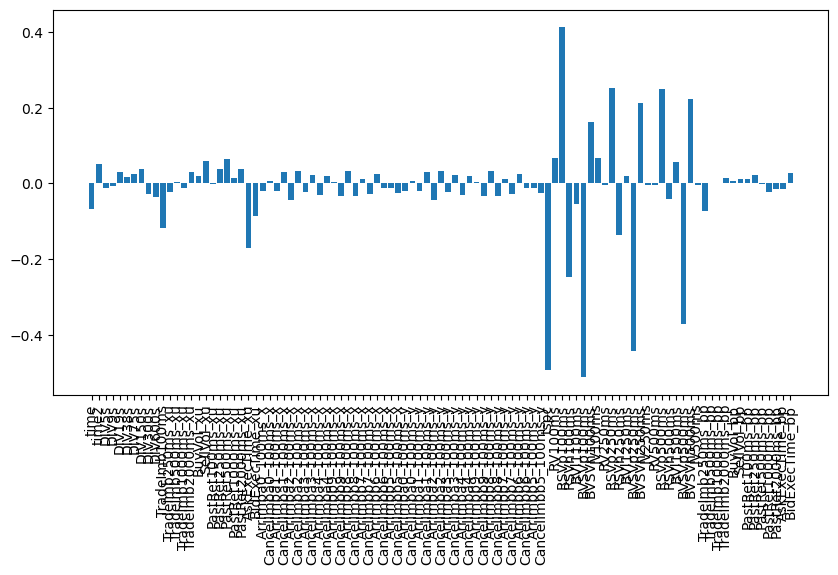

In [82]:
# xu target
importances = model.coef_[2]
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [56]:
# final features
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.01, max_iter=50)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_test_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train / Test set score:  385.9676957075305 -74.49339132427781 160.23567543812644


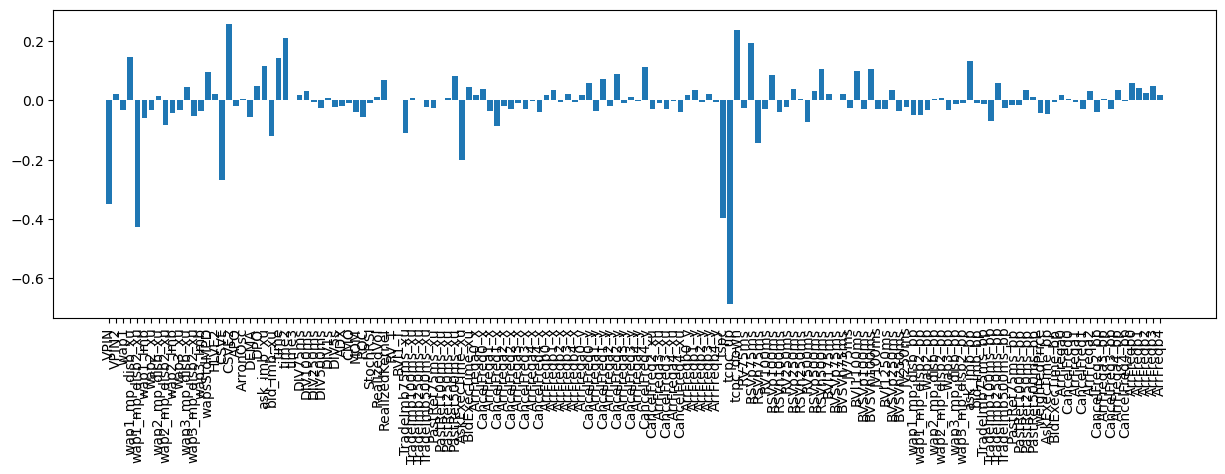

In [57]:
# xu target
importances = model.coef_[2]
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [59]:
gc.collect()

0

In [50]:
from catboost import CatBoostClassifier, Pool
import numpy as np

train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)
test_pool = Pool(X_test, y_test)

In [84]:
# новые фичи
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        subsample=0.75,
        random_strength=1,
        max_depth=7,l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0571893	test: 1.0628333	best: 1.0628333 (0)	total: 5.23s	remaining: 1m 39s
5:	learn: 0.8929869	test: 0.9210932	best: 0.9210932 (5)	total: 31.1s	remaining: 1m 12s
10:	learn: 0.7761920	test: 0.8204850	best: 0.8204850 (10)	total: 54.9s	remaining: 44.9s
15:	learn: 0.6889208	test: 0.7457119	best: 0.7457119 (15)	total: 1m 18s	remaining: 19.6s
19:	learn: 0.6338448	test: 0.6986568	best: 0.6986568 (19)	total: 1m 37s	remaining: 0us

bestTest = 0.6986568207
bestIteration = 19

Train / Test set score:  369.7289025764702 177.71013078213173 169.2634438535227


In [85]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        subsample=0.75,
        random_strength=1,
        max_depth=7,l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0571236	test: 1.0625858	best: 1.0625858 (0)	total: 4.99s	remaining: 1m 34s
5:	learn: 0.8923181	test: 0.9185905	best: 0.9185905 (5)	total: 26.6s	remaining: 1m 2s
10:	learn: 0.7754204	test: 0.8175314	best: 0.8175314 (10)	total: 51.5s	remaining: 42.2s
15:	learn: 0.6883849	test: 0.7428795	best: 0.7428795 (15)	total: 1m 16s	remaining: 19.2s
19:	learn: 0.6332856	test: 0.6957581	best: 0.6957581 (19)	total: 1m 35s	remaining: 0us

bestTest = 0.6957581274
bestIteration = 19

Train / Test set score:  344.9975292386221 162.321574327926 154.94068176601087


0:	learn: 1.0532890	test: 1.0582719	best: 1.0582719 (0)	total: 26.7s	remaining: 6m 13s
5:	learn: 0.8742763	test: 0.8989604	best: 0.8989604 (5)	total: 2m 37s	remaining: 3m 56s
10:	learn: 0.7476794	test: 0.7865632	best: 0.7865632 (10)	total: 4m 49s	remaining: 1m 45s
14:	learn: 0.6702759	test: 0.7180349	best: 0.7180349 (14)	total: 6m 36s	remaining: 0us

bestTest = 0.7180349405
bestIteration = 14

Train / Test set score:  719.3189032774119 344.55157804192015 298.6985026992677


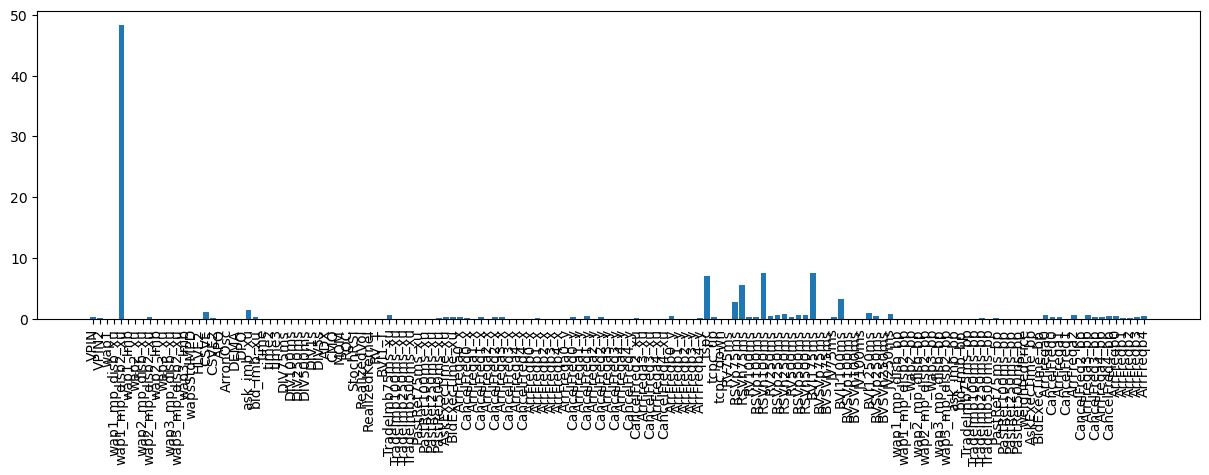

In [61]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        subsample=0.75,
#         random_strength=1,
        max_depth=10,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=15, verbose=5)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

**Теперь с Class weights**

In [63]:
class_weights = {
    -1: len(y_train) / (y_train==-1).sum(),
    0: len(y_train) / (y_train==0).sum(),
    1: len(y_train) / (y_train==1).sum()
}

0:	learn: 1.0979190	test: 1.0980021	best: 1.0980021 (0)	total: 7.78s	remaining: 2m 27s
5:	learn: 1.0944079	test: 1.0949670	best: 1.0949670 (5)	total: 46.4s	remaining: 1m 48s
10:	learn: 1.0909508	test: 1.0919397	best: 1.0919397 (10)	total: 1m 23s	remaining: 1m 8s
15:	learn: 1.0875374	test: 1.0889422	best: 1.0889422 (15)	total: 2m 2s	remaining: 30.6s
19:	learn: 1.0848186	test: 1.0866386	best: 1.0866386 (19)	total: 2m 32s	remaining: 0us

bestTest = 1.086638615
bestIteration = 19

Train / Test set score:  -37.7158798714874 10.991412175579299 17.884196840008364


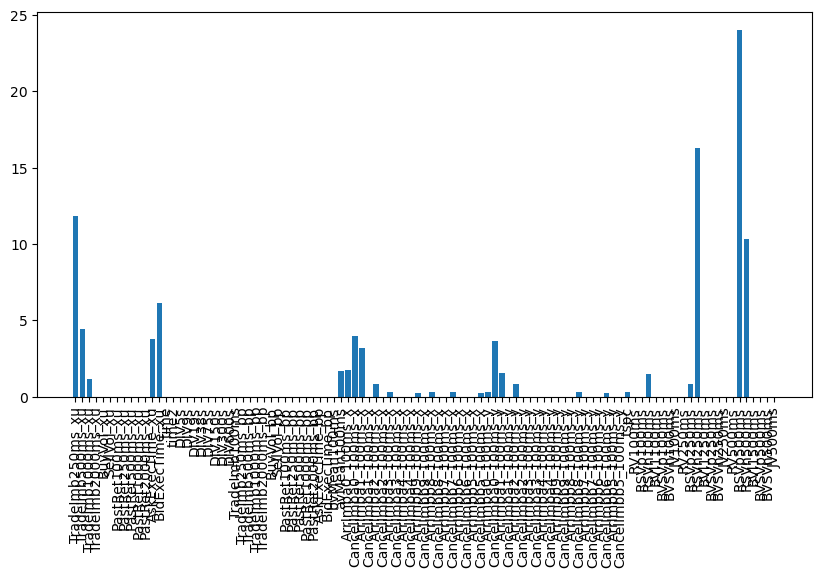

In [53]:
# bp target
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.85,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [86]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.85,
        random_strength=1,
        max_depth=8,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0976842	test: 1.0977421	best: 1.0977421 (0)	total: 15.6s	remaining: 4m 57s
5:	learn: 1.0930067	test: 1.0933870	best: 1.0933870 (5)	total: 1m 31s	remaining: 3m 32s
10:	learn: 1.0884060	test: 1.0890865	best: 1.0890865 (10)	total: 2m 48s	remaining: 2m 17s
15:	learn: 1.0838735	test: 1.0848669	best: 1.0848669 (15)	total: 4m 5s	remaining: 1m 1s
19:	learn: 1.0802985	test: 1.0815523	best: 1.0815523 (19)	total: 5m 8s	remaining: 0us

bestTest = 1.081552287
bestIteration = 19

Train / Test set score:  437.4185071932401 257.31801528785235 205.46907753802853


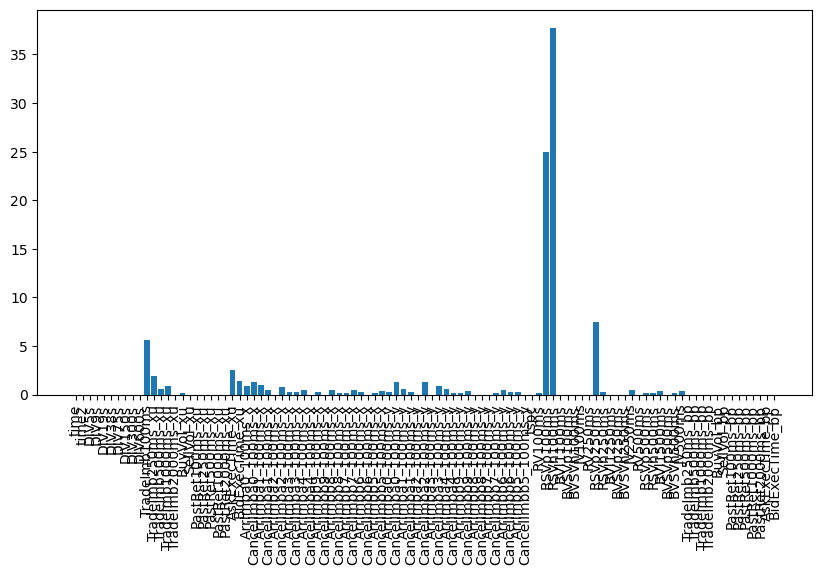

In [87]:
importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [48]:
gc.collect()

555

0:	learn: 0.8092646	test: 0.8441700	best: 0.8441700 (0)	total: 48.7s	remaining: 7m 18s
2:	learn: 0.6030895	test: 0.6694503	best: 0.6694503 (2)	total: 2m 24s	remaining: 5m 36s
4:	learn: 0.5220497	test: 0.6060633	best: 0.6060633 (4)	total: 3m 59s	remaining: 3m 59s
6:	learn: 0.4789786	test: 0.5879468	best: 0.5879468 (6)	total: 5m 33s	remaining: 2m 23s
8:	learn: 0.4531341	test: 0.5835937	best: 0.5835937 (8)	total: 7m 9s	remaining: 47.7s
9:	learn: 0.4439675	test: 0.5802978	best: 0.5802978 (9)	total: 7m 55s	remaining: 0us

bestTest = 0.5802977692
bestIteration = 9

Train / Test set score:  536.2450449782515 256.0691829226416 207.6673480784862


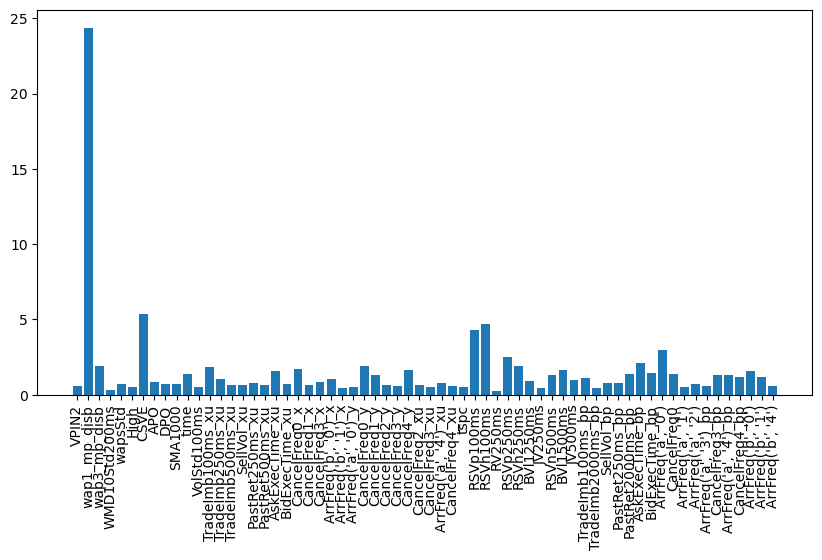

In [57]:
# xu target + new buch of indicators from the beggining

model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.33,
        subsample=0.85,
#         random_strength=1,
        max_depth=12,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

### P.s пока что кажется что почти никакие новые фичи не имеют значимости, а значит надо отбросить все совсем уж нулевые и попробовать что-то улучшить с теми фичами, которые имеют важность


0:	learn: 1.0684986	test: 1.0709467	best: 1.0709467 (0)	total: 29.8s	remaining: 11m 55s
2:	learn: 1.0143752	test: 1.0223656	best: 1.0223656 (2)	total: 1m 30s	remaining: 11m 2s
4:	learn: 0.9675221	test: 0.9789308	best: 0.9789308 (4)	total: 2m 29s	remaining: 9m 59s
6:	learn: 0.9259122	test: 0.9412773	best: 0.9412773 (6)	total: 3m 28s	remaining: 8m 57s
8:	learn: 0.8887000	test: 0.9075045	best: 0.9075045 (8)	total: 4m 27s	remaining: 7m 54s
10:	learn: 0.8554893	test: 0.8773182	best: 0.8773182 (10)	total: 5m 25s	remaining: 6m 54s
12:	learn: 0.8255521	test: 0.8500790	best: 0.8500790 (12)	total: 6m 24s	remaining: 5m 54s
14:	learn: 0.7988830	test: 0.8263611	best: 0.8263611 (14)	total: 7m 24s	remaining: 4m 56s
16:	learn: 0.7747712	test: 0.8044972	best: 0.8044972 (16)	total: 8m 22s	remaining: 3m 56s
18:	learn: 0.7529947	test: 0.7850628	best: 0.7850628 (18)	total: 9m 21s	remaining: 2m 57s
20:	learn: 0.7327441	test: 0.7667468	best: 0.7667468 (20)	total: 10m 18s	remaining: 1m 57s
22:	learn: 0.714614

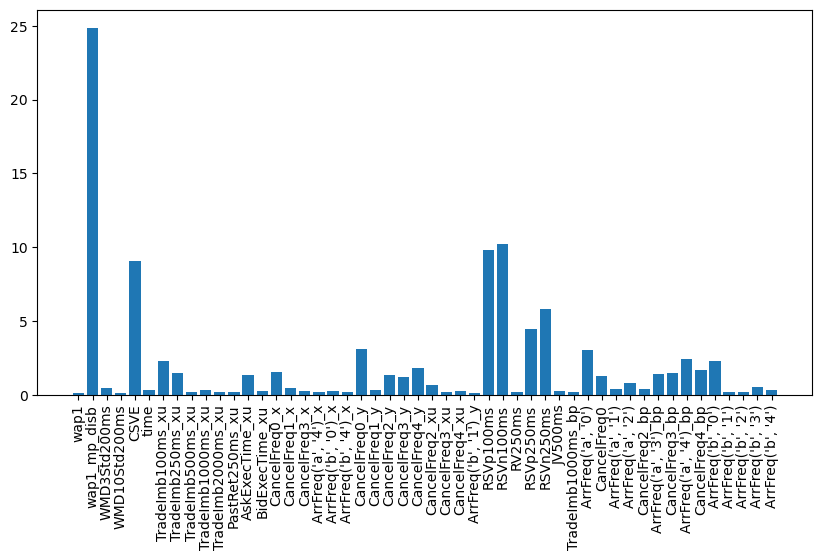

In [60]:
# xu target + new buch of indicators from the beggining
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.03,
        subsample=0.7,
#         random_strength=1,
        max_depth=10,
        l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=25, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

In [ ]:
# xu target + new buch of indicators from the beggining
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.7,
#         random_strength=1,
        max_depth=15,
        l2_leaf_reg=5, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=15, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

#### Добавил новых горизонтов, порезал слишком долгие, раскрыл тему WAP_disbalance, тк результаты выше показали что что-то там работает


0:	learn: 0.8497054	test: 0.8846126	best: 0.8846126 (0)	total: 21.1s	remaining: 3m 9s
2:	learn: 0.6650886	test: 0.7413630	best: 0.7413630 (2)	total: 1m	remaining: 2m 21s
4:	learn: 0.5915011	test: 0.6961242	best: 0.6961242 (4)	total: 1m 39s	remaining: 1m 39s
6:	learn: 0.5507306	test: 0.6831499	best: 0.6831499 (6)	total: 2m 18s	remaining: 59.3s
8:	learn: 0.5272442	test: 0.6735898	best: 0.6735898 (8)	total: 2m 59s	remaining: 19.9s
9:	learn: 0.5145144	test: 0.6728631	best: 0.6728631 (9)	total: 3m 19s	remaining: 0us

bestTest = 0.6728631477
bestIteration = 9

Train / Test set score:  478.24147712684106 246.25685501774115 182.4946596845532


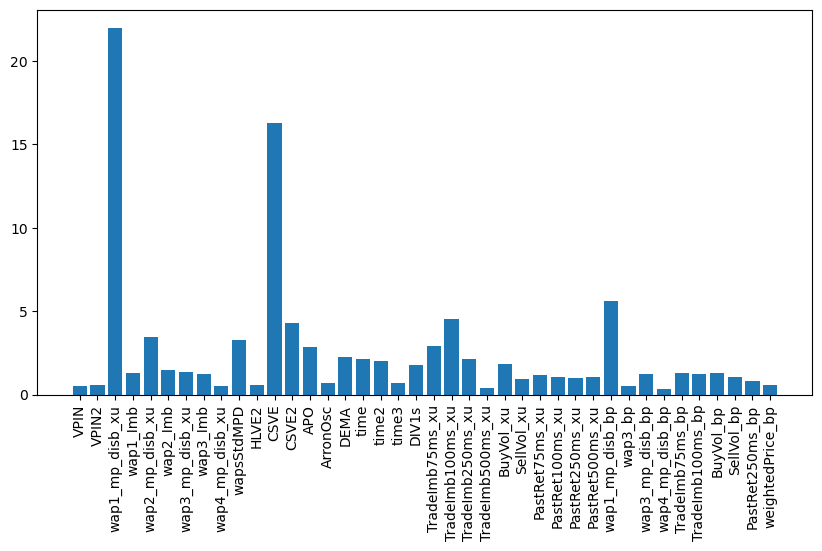

In [44]:
# xu target + new buch of indicators from the beggining. Добавил новых горизонтов, порезал слишком долгие, раскрыл тему WAP_disbalance, тк результаты выше показали что что-то там работает

model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.33,
        subsample=0.85,
#         random_strength=1,
        max_depth=12,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

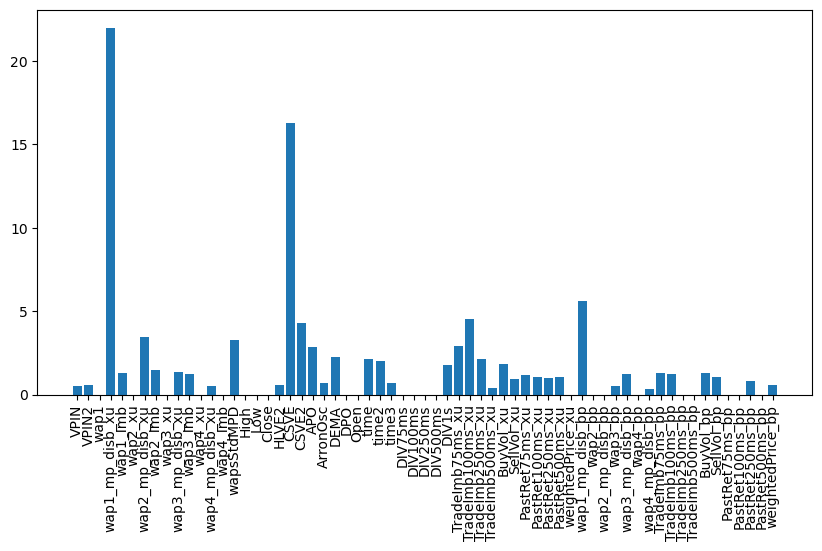

In [45]:
importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

#### Так. Выше у меня случайно часть фичей отвалилась. Перезапустил, но штуку сверху оставлю для сравнения.

0:	learn: 0.9668505	test: 0.9816742	best: 0.9816742 (0)	total: 34.2s	remaining: 5m 8s
2:	learn: 0.7989017	test: 0.8329627	best: 0.8329627 (2)	total: 1m 40s	remaining: 3m 54s
4:	learn: 0.6965238	test: 0.7429360	best: 0.7429360 (4)	total: 2m 46s	remaining: 2m 46s
6:	learn: 0.6260425	test: 0.6827150	best: 0.6827150 (6)	total: 3m 52s	remaining: 1m 39s
8:	learn: 0.5768048	test: 0.6439833	best: 0.6439833 (8)	total: 4m 58s	remaining: 33.2s
9:	learn: 0.5567404	test: 0.6271128	best: 0.6271128 (9)	total: 5m 31s	remaining: 0us

bestTest = 0.6271127758
bestIteration = 9

Train / Test set score:  563.5158629864895 292.07351621614833 244.24324916238265


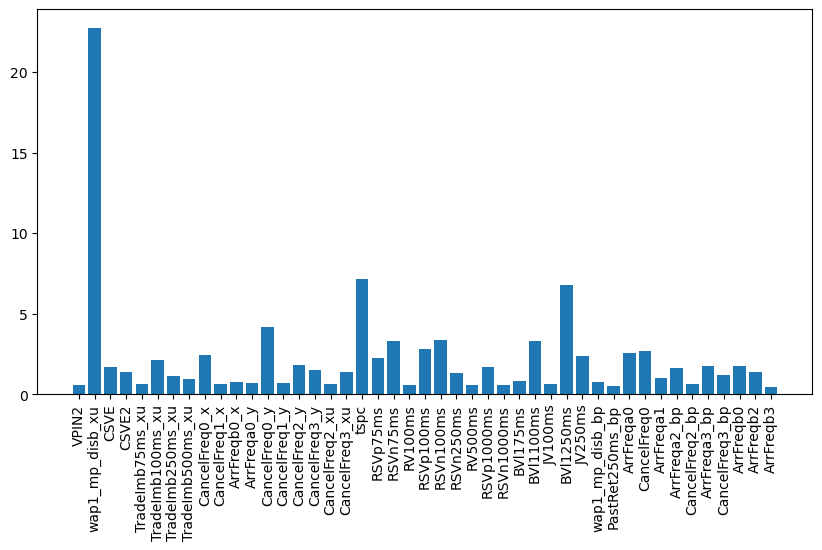

In [47]:
# xu target + new buch of indicators from the beggining. Добавил новых горизонтов, порезал слишком долгие, раскрыл тему WAP_disbalance, тк результаты выше показали что что-то там работает

model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.13,
        subsample=0.8,
#         random_strength=1,
        max_depth=12,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

**Видно, что дополнительные фичи вокруг взаимосвязи WAP и  mid_price позволили повысить метрику на тесте на тесте и валидации на..**[читать продолжение в источнике по ссылке..]

In [3]:
print(f'+{round(292/ 257 - 1, 2)}% +{round(244/206 - 1, 2)}%')

+0.14% +0.18%


In [49]:
gc.collect()

0

Ещё пару фиксов с фичами.

0:	learn: 0.9666625	test: 0.9829800	best: 0.9829800 (0)	total: 41.1s	remaining: 6m 9s
2:	learn: 0.7990364	test: 0.8339815	best: 0.8339815 (2)	total: 2m 2s	remaining: 4m 45s
4:	learn: 0.6933319	test: 0.7427995	best: 0.7427995 (4)	total: 3m 24s	remaining: 3m 24s
6:	learn: 0.6210904	test: 0.6808969	best: 0.6808969 (6)	total: 4m 45s	remaining: 2m 2s
8:	learn: 0.5697432	test: 0.6366573	best: 0.6366573 (8)	total: 6m 4s	remaining: 40.5s
9:	learn: 0.5500352	test: 0.6219747	best: 0.6219747 (9)	total: 6m 45s	remaining: 0us

bestTest = 0.6219747264
bestIteration = 9

Train / Test set score:  568.5581502742469 293.44828037526287 242.6059803501826


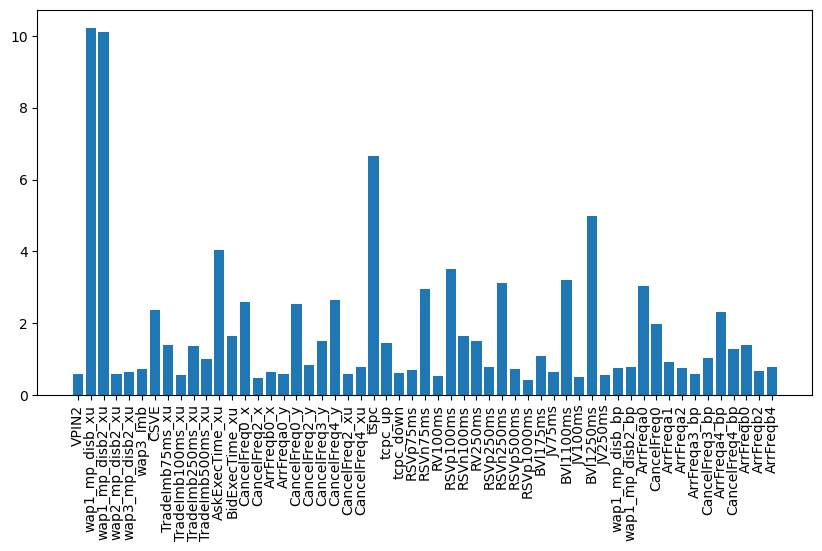

In [52]:
# xu target + new buch of indicators from the beggining. Добавил новых горизонтов, порезал слишком долгие, раскрыл тему WAP_disbalance, тк результаты выше показали что что-то там работает

model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.13,
        subsample=0.8,
#         random_strength=1,
        max_depth=12,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = Xcolumns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

0:	learn: 0.9613782	test: 0.9842779	best: 0.9842779 (0)	total: 1m 23s	remaining: 12m 32s
2:	learn: 0.7860750	test: 0.8366522	best: 0.8366522 (2)	total: 4m 5s	remaining: 9m 32s
4:	learn: 0.6747563	test: 0.7440347	best: 0.7440347 (4)	total: 6m 48s	remaining: 6m 48s
6:	learn: 0.6002084	test: 0.6813351	best: 0.6813351 (6)	total: 9m 32s	remaining: 4m 5s
8:	learn: 0.5458430	test: 0.6411777	best: 0.6411777 (8)	total: 12m 11s	remaining: 1m 21s
9:	learn: 0.5251534	test: 0.6247023	best: 0.6247023 (9)	total: 13m 34s	remaining: 0us

bestTest = 0.6247023072
bestIteration = 9

Train / Test set score:  614.358262156451 296.603828611334 249.37275587758066


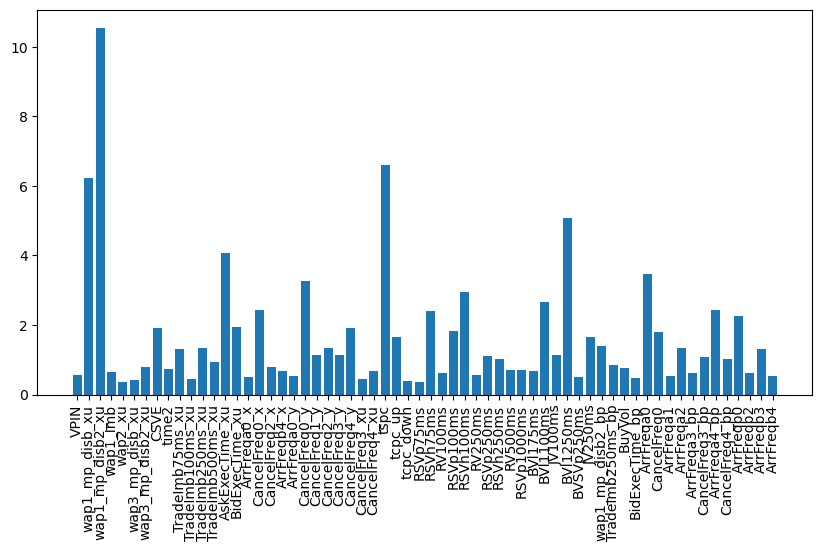

In [57]:
# xu target + new buch of indicators from the beggining. Добавил новых горизонтов, порезал слишком долгие, раскрыл тему WAP_disbalance, тк результаты выше показали что что-то там работает

model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.13,
        subsample=0.8,
#         random_strength=1,
        max_depth=14,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = Xcolumns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

In [66]:
np.save('y_test_pred.npy', np.array(y_test_pred).astype('int8'))
np.save('y_val_pred.npy', np.array(y_val_pred).astype('int8'))

In [67]:
model_final.save_model('catboost_model.bin')

In [68]:
gc.collect()

12814

# Финальная модель

Learning rate set to 0.5
0:	learn: 0.6860671	test: 0.7471485	best: 0.7471485 (0)	total: 47.5s	remaining: 11m 5s
2:	learn: 0.4944331	test: 0.6027372	best: 0.6027372 (2)	total: 2m 17s	remaining: 9m 8s
4:	learn: 0.4280199	test: 0.5685855	best: 0.5685855 (4)	total: 3m 44s	remaining: 7m 28s
6:	learn: 0.3894663	test: 0.5555648	best: 0.5555648 (6)	total: 5m 13s	remaining: 5m 58s
8:	learn: 0.3621717	test: 0.5588553	best: 0.5555648 (6)	total: 6m 54s	remaining: 4m 36s
10:	learn: 0.3423191	test: 0.5643998	best: 0.5555648 (6)	total: 8m 34s	remaining: 3m 7s
12:	learn: 0.3255753	test: 0.5746015	best: 0.5555648 (6)	total: 10m 10s	remaining: 1m 33s
14:	learn: 0.3047642	test: 0.5827199	best: 0.5555648 (6)	total: 11m 39s	remaining: 0us

bestTest = 0.5555647571
bestIteration = 6

Shrink model to first 7 iterations.
Train / Test set score:  648.5808242940457 296.6041063224555 244.8314343006779


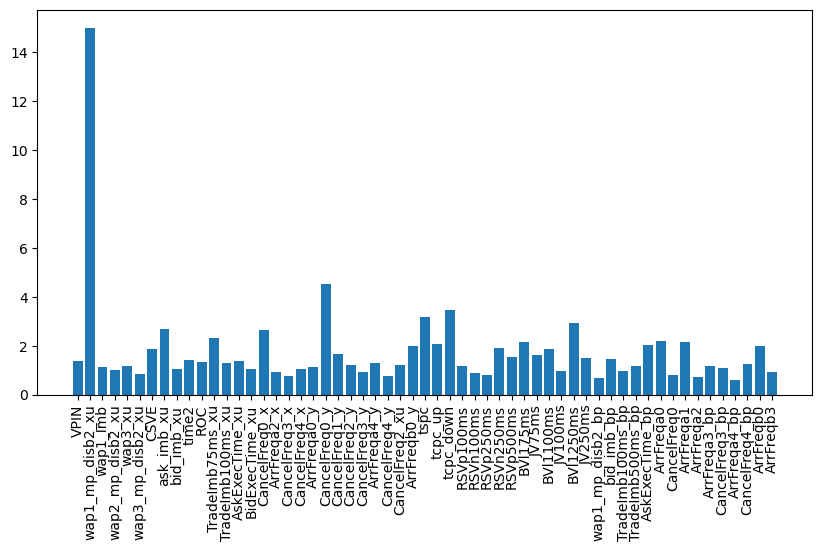

In [69]:
# final
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
#         learning_rate=0.13,
        subsample=0.7,
#         random_strength=1,
        max_depth=13,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

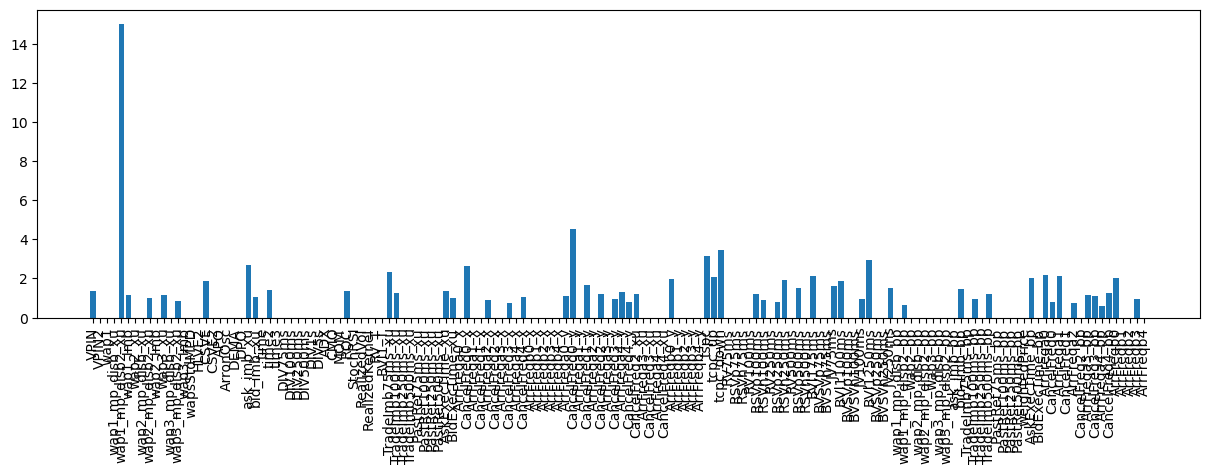

In [70]:
importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [53]:
gc.collect()
class_weights = {
    -1: len(y_train) / (y_train==-1).sum(),
    0: len(y_train) / (y_train==0).sum(),
    1: len(y_train) / (y_train==1).sum()
}
print(class_weights)

{-1: 13.99366104016115, 0: 1.1687419871216491, 1: 13.713991132770635}


In [ ]:
# final
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
#         learning_rate=0.13,
        subsample=0.85,
#         random_strength=1,
        max_depth=13,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(14, 4))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

Learning rate set to 0.5
0:	learn: 0.6935657	test: 0.7570181	best: 0.7570181 (0)	total: 56s	remaining: 8m 23s


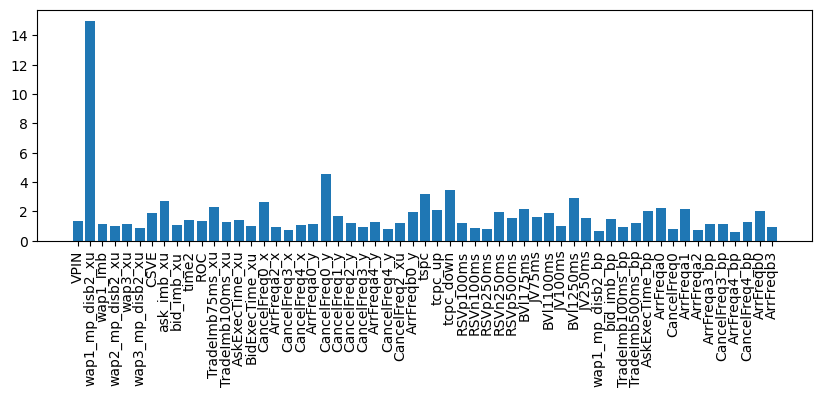

In [72]:
importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = X.columns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

# Самое важное

Хочу на вале 300 добить :)

0:	learn: 0.9507673	test: 0.9673464	best: 0.9673464 (0)	total: 35.7s	remaining: 11m 17s
2:	learn: 0.7739558	test: 0.8102171	best: 0.8102171 (2)	total: 1m 47s	remaining: 10m 8s
4:	learn: 0.6682385	test: 0.7164909	best: 0.7164909 (4)	total: 2m 56s	remaining: 8m 50s
6:	learn: 0.6003866	test: 0.6567515	best: 0.6567515 (6)	total: 4m 10s	remaining: 7m 44s
8:	learn: 0.5537317	test: 0.6163043	best: 0.6163043 (8)	total: 5m 20s	remaining: 6m 31s
10:	learn: 0.5210478	test: 0.5912234	best: 0.5912234 (10)	total: 6m 30s	remaining: 5m 19s
12:	learn: 0.4956911	test: 0.5705317	best: 0.5705317 (12)	total: 7m 39s	remaining: 4m 7s
14:	learn: 0.4768291	test: 0.5575186	best: 0.5575186 (14)	total: 8m 48s	remaining: 2m 56s
16:	learn: 0.4629175	test: 0.5466098	best: 0.5466098 (16)	total: 9m 55s	remaining: 1m 45s
18:	learn: 0.4515182	test: 0.5396297	best: 0.5396297 (18)	total: 11m 1s	remaining: 34.8s
19:	learn: 0.4459230	test: 0.5367062	best: 0.5367062 (19)	total: 11m 37s	remaining: 0us

bestTest = 0.5367061607

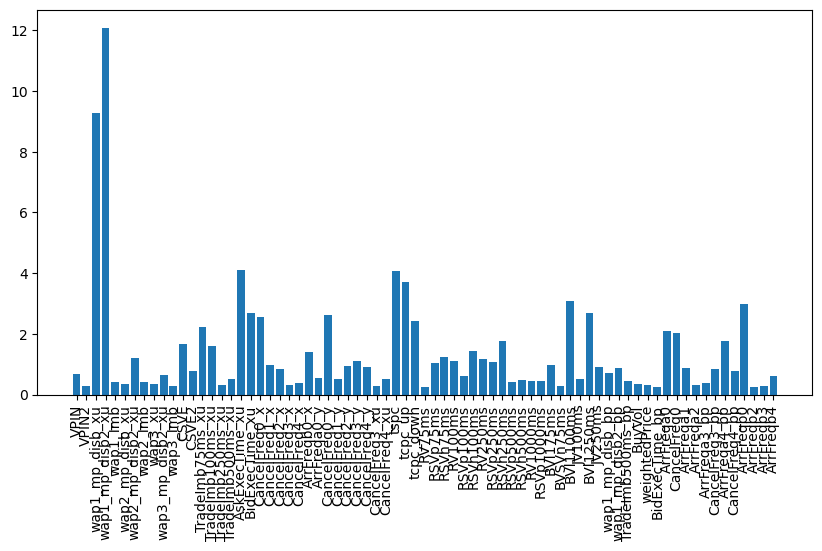

In [76]:
# xu target + new buch of indicators from the beggining. Добавил новых горизонтов, порезал слишком долгие, раскрыл тему WAP_disbalance, тк результаты выше показали что что-то там работает

model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.15,
        subsample=0.8,
#         random_strength=1,
        max_depth=11,
#         l2_leaf_reg=4, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=2, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

importances = model_final.get_feature_importance()
nonzero_importances = importances[importances != 0]  # Filter out columns with zero importance
nonzero_columns = Xcolumns[importances != 0]  # Get corresponding column names
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(nonzero_importances)), nonzero_importances)
ax.set_xticks(range(len(nonzero_importances)))
ax.set_xticklabels(nonzero_columns, rotation=90)
plt.show()

In [77]:
print(f'+{round(297/ 257 - 1, 2)}% +{round(243/206 - 1, 2)}%')

+0.16% +0.18%


Ладно и так пока сойдет. Пора писать бекстестинг модели. 

In [123]:
gc.collect()

99465

### (Other and previous experiments) skip.

In [73]:
class_weights2 = {
    -1: 0.9 * len(y_train) / (y_train==-1).sum(),
    0: len(y_train) / (y_train==0).sum(),
    1: 0.9 * len(y_train) / (y_train==1).sum()
}

In [74]:
# Новые фичи
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.85,
        random_strength=1,
        max_depth=8,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5, class_weights=class_weights2)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0976926	test: 1.0977690	best: 1.0977690 (0)	total: 13.2s	remaining: 4m 11s
5:	learn: 1.0930560	test: 1.0934642	best: 1.0934642 (5)	total: 1m 16s	remaining: 2m 59s
10:	learn: 1.0884981	test: 1.0892564	best: 1.0892564 (10)	total: 2m 20s	remaining: 1m 55s
15:	learn: 1.0839604	test: 1.0850478	best: 1.0850478 (15)	total: 3m 24s	remaining: 51.2s
19:	learn: 1.0804210	test: 1.0817961	best: 1.0817961 (19)	total: 4m 17s	remaining: 0us

bestTest = 1.081796109
bestIteration = 19

Train / Test set score:  441.781620715831 259.8342327290998 208.24737803229206


In [75]:
# Новые фичи
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.85,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=200, verbose=5, class_weights=class_weights2)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0976970	test: 1.0977706	best: 1.0977706 (0)	total: 4.95s	remaining: 16m 25s
5:	learn: 1.0931312	test: 1.0935399	best: 1.0935399 (5)	total: 28.2s	remaining: 15m 12s
10:	learn: 1.0886000	test: 1.0893492	best: 1.0893492 (10)	total: 50.7s	remaining: 14m 31s
15:	learn: 1.0841481	test: 1.0852014	best: 1.0852014 (15)	total: 1m 13s	remaining: 14m 4s
20:	learn: 1.0797542	test: 1.0811255	best: 1.0811255 (20)	total: 1m 35s	remaining: 13m 36s
25:	learn: 1.0754112	test: 1.0770644	best: 1.0770644 (25)	total: 1m 58s	remaining: 13m 12s
30:	learn: 1.0711118	test: 1.0730747	best: 1.0730747 (30)	total: 2m 20s	remaining: 12m 46s
35:	learn: 1.0668909	test: 1.0691601	best: 1.0691601 (35)	total: 2m 43s	remaining: 12m 26s
40:	learn: 1.0627288	test: 1.0652929	best: 1.0652929 (40)	total: 3m 5s	remaining: 12m
45:	learn: 1.0586031	test: 1.0614598	best: 1.0614598 (45)	total: 3m 27s	remaining: 11m 34s
50:	learn: 1.0544935	test: 1.0576551	best: 1.0576551 (50)	total: 3m 49s	remaining: 11m 11s
55:	learn: 1

In [80]:
gc.collect()

0

In [ ]:
# Новые фичи
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.33,
        subsample=0.85,
        random_strength=1,
        max_depth=15,
        l2_leaf_reg=1, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=5, class_weights=class_weights2)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

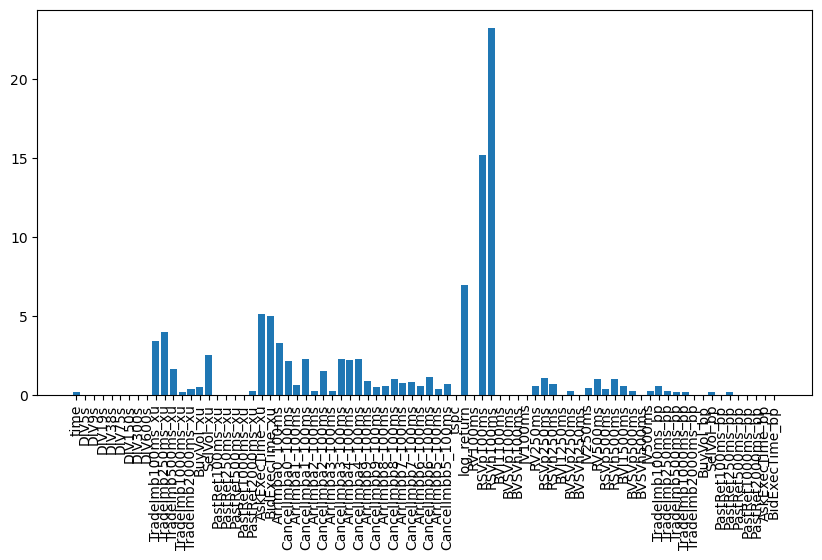

In [97]:
importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [88]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.85,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0977213	test: 1.0977808	best: 1.0977808 (0)	total: 5.91s	remaining: 1m 52s
5:	learn: 1.0932855	test: 1.0935744	best: 1.0935744 (5)	total: 31.8s	remaining: 1m 14s
10:	learn: 1.0889106	test: 1.0894445	best: 1.0894445 (10)	total: 57.8s	remaining: 47.3s
15:	learn: 1.0845710	test: 1.0853430	best: 1.0853430 (15)	total: 1m 23s	remaining: 20.9s
19:	learn: 1.0811279	test: 1.0820864	best: 1.0820864 (19)	total: 1m 44s	remaining: 0us

bestTest = 1.08208637
bestIteration = 19

Train / Test set score:  434.4271738969955 257.74498209497114 207.55686292574998


In [89]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.85,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=30, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0977213	test: 1.0977808	best: 1.0977808 (0)	total: 6.19s	remaining: 2m 59s
5:	learn: 1.0932855	test: 1.0935744	best: 1.0935744 (5)	total: 33.7s	remaining: 2m 14s
10:	learn: 1.0889106	test: 1.0894445	best: 1.0894445 (10)	total: 60s	remaining: 1m 43s
15:	learn: 1.0845710	test: 1.0853430	best: 1.0853430 (15)	total: 1m 25s	remaining: 1m 14s
20:	learn: 1.0802754	test: 1.0812814	best: 1.0812814 (20)	total: 1m 51s	remaining: 47.9s
25:	learn: 1.0760649	test: 1.0773219	best: 1.0773219 (25)	total: 2m 17s	remaining: 21.2s
29:	learn: 1.0727275	test: 1.0741682	best: 1.0741682 (29)	total: 2m 38s	remaining: 0us

bestTest = 1.074168235
bestIteration = 29

Train / Test set score:  435.37210549222675 257.8148915066146 208.09503224506923


In [90]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.8,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0977213	test: 1.0977808	best: 1.0977808 (0)	total: 5.45s	remaining: 1m 43s
5:	learn: 1.0932924	test: 1.0935856	best: 1.0935856 (5)	total: 30.2s	remaining: 1m 10s
10:	learn: 1.0889174	test: 1.0894556	best: 1.0894556 (10)	total: 54.8s	remaining: 44.8s
15:	learn: 1.0845778	test: 1.0853540	best: 1.0853540 (15)	total: 1m 19s	remaining: 19.8s
19:	learn: 1.0811405	test: 1.0821037	best: 1.0821037 (19)	total: 1m 39s	remaining: 0us

bestTest = 1.082103707
bestIteration = 19

Train / Test set score:  434.85252396034866 258.0838565564983 207.7775670386161


In [91]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.75,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0977213	test: 1.0977808	best: 1.0977808 (0)	total: 5.2s	remaining: 1m 38s
5:	learn: 1.0932933	test: 1.0935847	best: 1.0935847 (5)	total: 28.9s	remaining: 1m 7s
10:	learn: 1.0889184	test: 1.0894578	best: 1.0894578 (10)	total: 52.8s	remaining: 43.2s
15:	learn: 1.0845851	test: 1.0853647	best: 1.0853647 (15)	total: 1m 15s	remaining: 18.8s
19:	learn: 1.0811463	test: 1.0821096	best: 1.0821096 (19)	total: 1m 34s	remaining: 0us

bestTest = 1.082109574
bestIteration = 19

Train / Test set score:  435.76217029780867 257.7514243433077 207.76411204444742


In [92]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.7,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=20, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0977213	test: 1.0977808	best: 1.0977808 (0)	total: 4.92s	remaining: 1m 33s
5:	learn: 1.0932978	test: 1.0935918	best: 1.0935918 (5)	total: 27.2s	remaining: 1m 3s
10:	learn: 1.0889278	test: 1.0894726	best: 1.0894726 (10)	total: 49.9s	remaining: 40.9s
15:	learn: 1.0845904	test: 1.0853745	best: 1.0853745 (15)	total: 1m 11s	remaining: 18s
19:	learn: 1.0811568	test: 1.0821248	best: 1.0821248 (19)	total: 1m 29s	remaining: 0us

bestTest = 1.082124821
bestIteration = 19

Train / Test set score:  436.47939392605974 257.6378015538314 207.95403534080674


In [93]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.8,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=10, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0977213	test: 1.0977808	best: 1.0977808 (0)	total: 5.5s	remaining: 49.5s
5:	learn: 1.0932924	test: 1.0935856	best: 1.0935856 (5)	total: 31.4s	remaining: 20.9s
9:	learn: 1.0897916	test: 1.0902859	best: 1.0902859 (9)	total: 51.7s	remaining: 0us

bestTest = 1.090285926
bestIteration = 9

Train / Test set score:  434.3700548576724 259.7896001933919 208.19406791222156


In [104]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.01,
        subsample=0.8,
#         random_strength=1,
        max_depth=7,
#         l2_leaf_reg=1, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=15, verbose=5, class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

0:	learn: 1.0897397	test: 1.0903331	best: 1.0903331 (0)	total: 5.43s	remaining: 1m 16s
5:	learn: 1.0484321	test: 1.0511957	best: 1.0511957 (5)	total: 31.2s	remaining: 46.9s
10:	learn: 1.0118763	test: 1.0169460	best: 1.0169460 (10)	total: 56s	remaining: 20.4s
14:	learn: 0.9853486	test: 0.9920590	best: 0.9920590 (14)	total: 1m 16s	remaining: 0us

bestTest = 0.9920589579
bestIteration = 14

Train / Test set score:  434.1248012008212 257.18357068243796 208.14571184625686


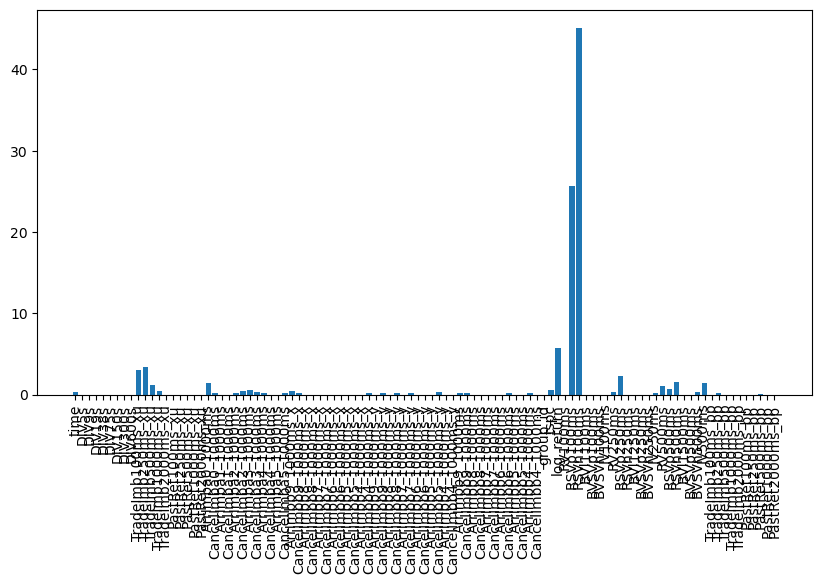

In [107]:
importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [122]:
gc.collect()

59082

In [118]:
new_cols = X.columns[:-32].values
new_cols

array(['time', 'DIV5s', 'DIV9s', 'DIV19s', 'DIV38s', 'DIV75s', 'DIV150s',
       'DIV300s', 'DIV600s', 'TradeImb100ms_xu', 'TradeImb250ms_xu',
       'TradeImb500ms_xu', 'TradeImb1000ms_xu', 'TradeImb2000ms_xu',
       'PastRet100ms_xu', 'PastRet250ms_xu', 'PastRet500ms_xu',
       'PastRet1000ms_xu', 'PastRet2000ms_xu', 'ArrImba0_1000ms',
       'CancelImba0_1000ms', 'ArrImba1_1000ms', 'CancelImba1_1000ms',
       'ArrImba2_1000ms', 'CancelImba2_1000ms', 'ArrImba3_1000ms',
       'CancelImba3_1000ms', 'ArrImba4_1000ms', 'CancelImba4_1000ms',
       'ArrImba5_1000ms', 'CancelImba5_1000ms', 'ArrImbb9_1000ms_x',
       'CancelImbb9_1000ms_x', 'ArrImbb8_1000ms_x',
       'CancelImbb8_1000ms_x', 'ArrImbb7_1000ms_x',
       'CancelImbb7_1000ms_x', 'ArrImbb6_1000ms_x',
       'CancelImbb6_1000ms_x', 'ArrImbb5_1000ms_x',
       'CancelImbb5_1000ms_x', 'ArrImbb4_1000ms_x',
       'CancelImbb4_1000ms_x', 'ArrImbb9_1000ms_y',
       'CancelImbb9_1000ms_y', 'ArrImbb8_1000ms_y',
       'CancelImbb

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=False)

X_train, X_test, y_train, y_test = train_test_split(X[new_cols], y, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42, shuffle=False)

X_train = scaler.fit_transform(X_train)
X_val  = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [128]:
train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)
test_pool = Pool(X_test, y_test)

In [147]:
gc.collect()

82957

In [142]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
#         learning_rate=0.1,
        subsample=0.95,
#         random_strength=1,
        max_depth=7,
#         l2_leaf_reg=5, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=10, verbose=5, 
                                 class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

Learning rate set to 0.5
0:	learn: 0.8219840	test: 0.8435655	best: 0.8435655 (0)	total: 5.13s	remaining: 46.2s
5:	learn: 0.6939509	test: 0.7587093	best: 0.7544549 (3)	total: 27.3s	remaining: 18.2s
9:	learn: 0.6768811	test: 0.7509519	best: 0.7500756 (7)	total: 41.9s	remaining: 0us

bestTest = 0.7500755725
bestIteration = 7

Shrink model to first 8 iterations.
Train / Test set score:  289.84974573371534 181.93620895738243 140.3400621424155


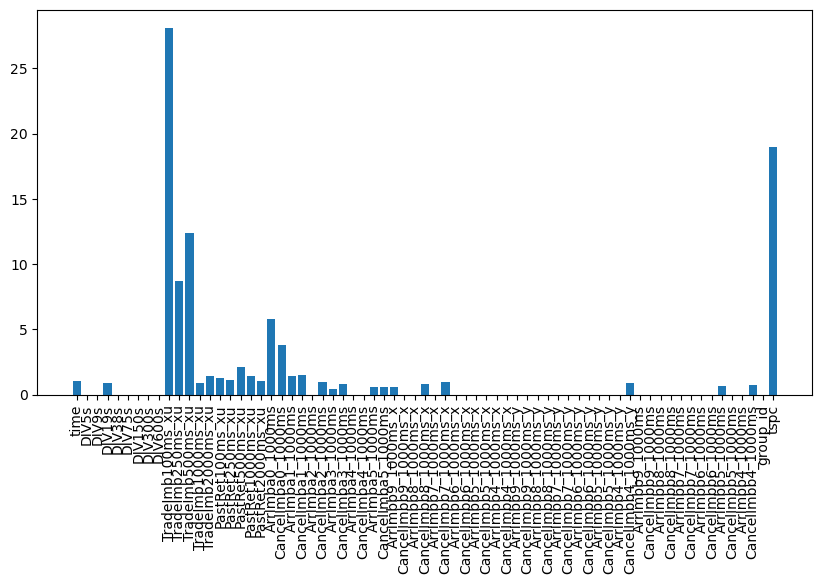

In [144]:
importances = model_final.get_feature_importance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(new_cols, rotation=90)
plt.show()

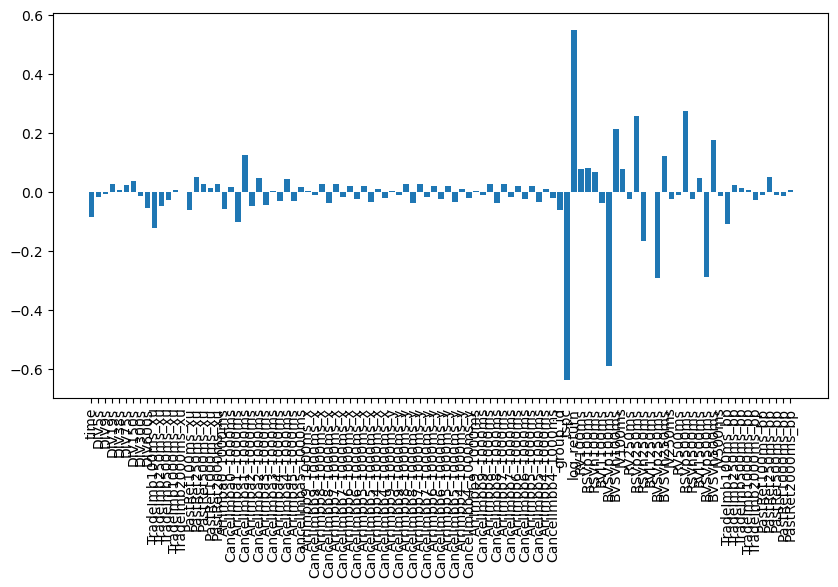

In [141]:
importances = model.coef_[2]
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

Сейчас я хочу поменять горизонт у arrivals, cancel imbalance, тк мне кажется что у них можно получить бОльшую полезность. Да и остальные фичи нам как бы намекают, что полезнее всего более короткие горизонты. Но перед этим хотелось бы оценить сколько денег на все таки принесла бы именно эта модель

In [ ]:
scaler = StandardScaler(copy=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42, shuffle=False)

X_train = scaler.fit_transform(X_train)
X_val  = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)
test_pool = Pool(X_test, y_test)

In [ ]:
model_final = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', random_seed=42,
        learning_rate=0.001,
        subsample=0.9,
        random_strength=1,
        max_depth=7,
        l2_leaf_reg=5, 
        bootstrap_type="Bernoulli", boosting_type = 'Plain',iterations=15, verbose=5, 
                                 class_weights=class_weights)

model_final.fit(train_pool, eval_set=val_pool)

y_train_pred = model_final.predict(train_pool)
y_val_pred = model_final.predict(val_pool)
y_test_pred = model_final.predict(test_pool)

train_score = metric(y_train, y_train_pred)
val_score = metric(y_val, y_val_pred)
test_score = metric(y_test, y_test_pred)
print("Train / Test set score: ", train_score, val_score, test_score)

# Пробуем написать бектест 

In [82]:
y_pred = np.concatenate([y_val_pred, y_test_pred], axis=0).reshape(-1)

In [90]:
print((y_pred == 1).sum() / len(y_pred))
print((y_pred == 0).sum() / len(y_pred))
print((y_pred == -1).sum() / len(y_pred))

0.21114335685556174
0.5868538513740917
0.20200279177034655


In [94]:
%%time
c = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        c += 1
print(c)

382691
CPU times: user 391 ms, sys: 2.05 ms, total: 393 ms
Wall time: 404 ms


Вполне быстро, можно не ухирщаться с векторизированным кодом. 

In [105]:
xu = pd.read_feather('/kaggle/input/testtask/xbtusd.feather', columns=['ask_price9', 'bid_price9', 'ask_vol9', 'bid_vol9'])[:10]
print(len(xu))
xu.head()

10


,ask_price9,bid_price9,ask_vol9,bid_vol9
0,23746.0,23739.5,34500,17300
1,23744.5,23739.5,137800,17300
2,23742.0,23739.5,59800,8700
3,23742.0,23739.5,59800,8700
4,23742.0,23739.5,59800,8700


In [106]:
gc.collect()
# xu = pd.read_feather('/kaggle/input/testtask/xbtusd.feather')[:10]
# print(len(xu))
# xu.head()

0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc


xu = pd.read_feather('/kaggle/input/testtask/xbtusd.feather', columns=['timestamp', 'ask_price9', 'bid_price9', 'ask_vol9', 'bid_vol9'])
print(xu.iloc[0])
# xu.drop(columns=ask_vols[1:], inplace=True)
# xu.drop(columns=bid_vols[1:], inplace=True)
# xu.drop(columns=ask_prices[1:], inplace=True)
# xu.drop(columns=ask_prices[1:], inplace=True)
gc.collect()


# real_ask = xu['ask_price0']
# real_bid = xu['bid_price0']

# real_mid = (real_ask + real_bid) / 2

# ask_vols = xu['ask_vol0']
# bid_vols = xu['bid_vol0']

xu['mid_price'] = (xu['bid_price9'] + xu['ask_price9']) / 2
# bp['mid_price'] = (bp['bid_price0'] + bp['ask_price0']) / 2

xu['dt'] = pd.to_datetime(xu['timestamp'], format='%y-%m-%d %H:%M:%S.%f')
# bp['dt'] = pd.to_datetime(bp['timestamp'], format='%y-%m-%d %H:%M:%S.%f')

xu['timestamp'] = xu['dt'].astype('int64') // 10**6
# bp['timestamp'] = bp['dt'].astype('int64') // 10**6


xu.set_index('dt', inplace=True)
# xu.sort_index(inplace=True)
# bp.set_index('dt', inplace=True)

# a = pd.merge_asof(xu['mid_price'], xu['mid_price'].shift(1, freq='100ms'), left_index=True, right_index=True)
# xu['log_return'] = np.log(a['mid_price_x']/a['mid_price_y'])
# xu['log_return'].sample(15)

# del xu
gc.collect()
xu.head()

timestamp     23-01-30 00:00:00.242707
ask_price9                     23746.0
bid_price9                     23739.5
ask_vol9                         34500
bid_vol9                         17300
Name: 0, dtype: object


,timestamp,ask_price9,bid_price9,ask_vol9,bid_vol9,mid_price
dt,,,,,,
2023-01-30 00:00:00.242707,1675036800242,23746.0,23739.5,34500,17300,23742.75
2023-01-30 00:00:00.242717,1675036800242,23744.5,23739.5,137800,17300,23742.00
2023-01-30 00:00:00.243175,1675036800243,23742.0,23739.5,59800,8700,23740.75
2023-01-30 00:00:00.246602,1675036800246,23742.0,23739.5,59800,8700,23740.75
2023-01-30 00:00:00.251949,1675036800251,23742.0,23739.5,59800,8700,23740.75


In [3]:
y_val_pred = np.load('/kaggle/input/predict/y_val_pred.npy')
y_test_pred = np.load('/kaggle/input/predict/y_test_pred.npy')

In [20]:
print(len(np.concatenate([y_val_pred, y_test_pred], axis=0)), len(xu_test))

1812470 1812766


In [4]:
# _, real_ask, _, ask_vols = train_test_split(real_ask, ask_vols, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
# _, real_bid, _, bid_vols = train_test_split(real_ask, ask_vols, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
_, xu_test,_ ,_ = train_test_split(xu, xu, train_size=0.7, test_size=0.3, random_state=42, shuffle=False)
y_pred = np.concatenate([y_val_pred, y_test_pred], axis=0)
xu_test = xu_test.iloc[-len(y_pred):]
xu_test['target'] = y_pred

# хотим узнать какие цены и объемы будут через 5мс и 100мс соответсвенно.

#ask
xu_test['ap5'] = pd.Series(xu_test['ask_price9'], xu_test.index).asof(xu_test.index + pd.Timedelta('5ms')).to_numpy()
xu_test['av5'] = pd.Series(xu_test['ask_vol9'], xu_test.index).asof(xu_test.index + pd.Timedelta('5ms')).to_numpy()
xu_test['ap100'] = pd.Series(xu_test['ask_price9'], xu_test.index).asof(xu_test.index + pd.Timedelta('100ms')).to_numpy()
xu_test['av100'] = pd.Series(xu_test['ask_vol9'], xu_test.index).asof(xu_test.index + pd.Timedelta('100ms')).to_numpy()

#bid
xu_test['bp5'] = pd.Series(xu_test['bid_price9'], xu_test.index).asof(xu_test.index + pd.Timedelta('5ms')).to_numpy()
xu_test['bv5'] = pd.Series(xu_test['bid_vol9'], xu_test.index).asof(xu_test.index + pd.Timedelta('5ms')).to_numpy()
xu_test['bp100'] = pd.Series(xu_test['bid_price9'], xu_test.index).asof(xu_test.index + pd.Timedelta('100ms')).to_numpy()
xu_test['bv100'] = pd.Series(xu_test['bid_vol9'], xu_test.index).asof(xu_test.index + pd.Timedelta('100ms')).to_numpy()


xu_test.head(100000).tail()

,timestamp,ask_price9,bid_price9,ask_vol9,bid_vol9,mid_price,target,ap5,av5,ap100,av100,bp5,bv5,bp100,bv100
dt,,,,,,,,,,,,,,,
2023-01-30 18:05:49.196756,1675101949196,23096.5,23096.0,2300,101900,23096.25,0,23096.5,2300,23098.5,48900,23096.0,101900,23098.0,114100
2023-01-30 18:05:49.197136,1675101949197,23096.5,23096.0,2300,101900,23096.25,0,23096.5,2300,23098.5,48900,23096.0,101900,23098.0,114100
2023-01-30 18:05:49.206333,1675101949206,23096.5,23096.0,300,101900,23096.25,0,23096.5,300,23098.5,64600,23096.0,101900,23098.0,114100
2023-01-30 18:05:49.219025,1675101949219,23096.5,23096.0,300,101900,23096.25,0,23096.5,300,23098.5,48900,23096.0,101900,23098.0,114100
2023-01-30 18:05:49.219081,1675101949219,23096.5,23096.0,300,101900,23096.25,0,23096.5,300,23098.5,48900,23096.0,101900,23098.0,114100


In [33]:
print((xu_test['bid_vol9'] != xu_test['bv5']).sum())
print((xu_test['ask_vol9'] != xu_test['av5']).sum())
print((xu_test['bid_price9'] != xu_test['bp5']).sum())
print((xu_test['ask_price9'] != xu_test['ap5']).sum())

204632
200542
48480
48812


#### Давайте воспользуемся предположением что в самом начале и конце мы можем покупать\продавать вне зависимости от best ask\bid объема


In [5]:
StartPriceBuy = xu['ask_price9'].iloc[0]
StartPriceSell = xu['bid_price9'].iloc[-1]

LastPriceSell = xu['bid_price9'].iloc[-1]

xu_fee = 0.00005
bp_fee = 0.00010 

# def getProfit(, fee):
#     return (amount / price) * (side - fee)

In [100]:
%%time
def backtest(xu_test):
    cash = 500000 # 500 000 $
    btc = 500000 / StartPriceBuy # 500 000$ в BTC
    fee = -0.000005
    
    print("Start cash: ", cash, " BTC: ", btc)
    
    cash_history = []
    btc_history = []
    total = []
    
    part = 0.1
    #XBT\USD - сколько стоит биток. покупаем - получаем биток, продаем, получаем доллары. Ask - человек просит за биток
    for i in range(len(xu_test) // 20):
        
        if xu_test['target'].iloc[i] == 1: # будем покупать и продавать через 100мс
            # вход
            in_vol = min(xu_test['av5'].iloc[i], cash * part)
            cash -= in_vol
            btc += in_vol / xu_test['ap5'].iloc[i] * part * (1 - fee)
            
            # выход (Если у нас латенси 5мс мы можем выставить ордер заранее чтобы совершить выход аккурат в момент)
            cash += min(xu_test['bv100'].iloc[i], in_vol) * (1 - fee)
            btc -= min(xu_test['bv100'].iloc[i], in_vol) / xu_test['bp100'].iloc[i]
            
            cash_history.append(cash)
            btc_history.append(btc)
            total.append(cash + btc*xu_test['bp5'][i])
            
        elif xu_test['target'].iloc[i] == -1: # будем продавать и покупать через 100мс
            # вход
            out_vol = min(xu_test['bv5'].iloc[i] , btc * part)
            
            btc -= out_vol / xu_test['bp5'].iloc[i] * (1 - fee)
            cash += out_vol * xu_test['bp5']
            
#             print("BTC delta: ", xu_test['bv5'].iloc[i] / xu_test['bp5'].iloc[i])
            
            # выход (Если у нас латенси 5мс мы можем выставить ордер заранее чтобы совершить выход аккурат в момент)
            cash -= min(xu_test['av100'].iloc[i], in_vol)
            btc += min(xu_test['av100'].iloc[i], in_vol )  / xu_test['ap100'].iloc[i] * (1 - fee)
            
            
            cash_history.append(cash)
            btc_history.append(btc)
            total.append(cash + btc*xu_test['ap5'][i])
#         btc_history.append(btc * xu_test['ap5'].iloc[i])
        
    return cash_history, btc_history, total
        
    
    
ch, bh, total = backtest(xu_test)

Start cash:  500000  BTC:  21.056177882590752
CPU times: user 3.11 s, sys: 2 ms, total: 3.11 s
Wall time: 3.11 s


In [145]:
%%time
def backtest(xu_test):
    cash = 500000 # 500 000 $
    pos = 500000 / StartPriceBuy # 500 000$ в BTC
    fee = 0.000005
    
    print("Start cash: ", cash, " BTC: ", pos)
    
    cash_history = []
    pos_history = []
    total = []
    part = 0.05
    #XBT\USD - сколько стоит биток. покупаем - получаем биток, продаем, получаем доллары. Ask - человек просит за биток
    for i in range(len(xu_test)):
        
        if xu_test['target'].iloc[i] == 1: # будем покупать и продавать через 100мс
            pos += xu_test['av5'].iloc[i] / xu_test['ap5'].iloc[i] * (1 - fee) * part
            cash -= xu_test['av5'].iloc[i] * part
            pos += xu_test['bv100'].iloc[i] / xu_test['bp100'].iloc[i] * (-1 - fee) * part
            cash += xu_test['bv100'].iloc[i] * part
            
            cash_history.append(cash)
            pos_history.append(pos)
            total.append(cash + pos * xu_test['bp5'][i] * (1-fee))
            
        elif xu_test['target'].iloc[i] == -1: # будем продавать и покупать через 100мс
            pos += xu_test['bv5'].iloc[i] / xu_test['bp5'].iloc[5] * (-1 - fee) * part
            cash += xu_test['bv5'].iloc[i] * part
            pos += xu_test['av100'].iloc[i] / xu_test['ap100'].iloc[i] * (1 - fee) * part
            cash -= xu_test['av100'].iloc[i] * part
            
            cash_history.append(cash)
            pos_history.append(pos)
            total.append(cash + pos * xu_test['ap5'][i] * (1-fee))
        
        
    return cash_history, pos_history, total
        
    
    
ch, bh, total = backtest(xu_test)

Start cash:  500000  BTC:  21.056177882590752
CPU times: user 1min 24s, sys: 81.7 ms, total: 1min 24s
Wall time: 1min 24s


In [108]:
ch[::10]

[623900,
 1840000,
 3054100,
 4143500,
 5145000,
 5639200,
 6419400,
 8550400,
 10681400,
 12812400,
 14943400,
 17074400,
 17467400,
 17806800,
 19398900,
 19931300,
 20813500,
 22191700,
 23760700,
 25370700,
 27029400,
 28879400,
 30737400,
 32629600,
 33934800,
 34428800,
 35699800,
 37406300,
 39173900,
 40865400,
 42866500,
 44881500,
 46996500,
 49111500,
 51226500,
 53341500,
 55456500,
 57571500,
 59686500,
 61801500,
 63915400,
 66027400,
 68139400,
 70251400,
 72363400,
 74452200,
 76535200,
 78663000,
 80850300,
 82899300,
 84948300,
 86997300,
 89044300,
 91092500,
 93141500,
 95190500,
 97247500,
 99316500,
 101385500,
 103454500,
 105567100,
 107887100,
 110254300,
 112298800,
 114385800,
 116492800,
 118599800,
 120610800,
 122557800,
 124504800,
 126451800,
 128398800,
 130345800,
 132292800,
 134239800,
 136186800,
 138133800,
 140080800,
 142027800,
 144058500,
 146284500,
 148487100,
 150173700,
 151447300,
 151878800,
 151392400,
 150906400,
 150205000,
 149177000,

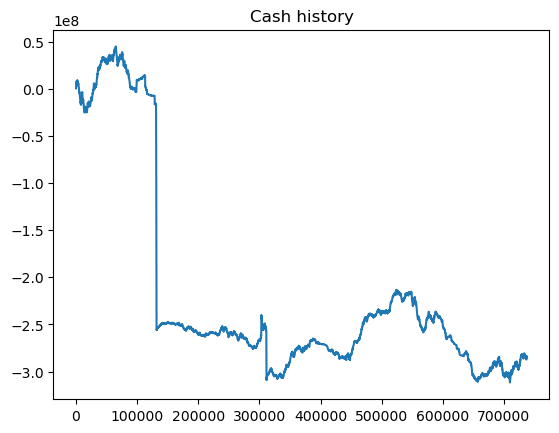

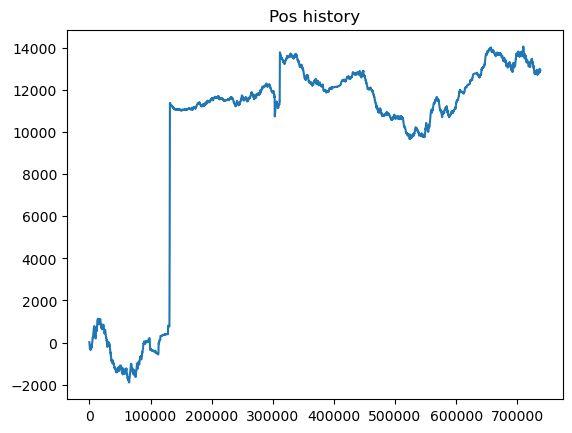

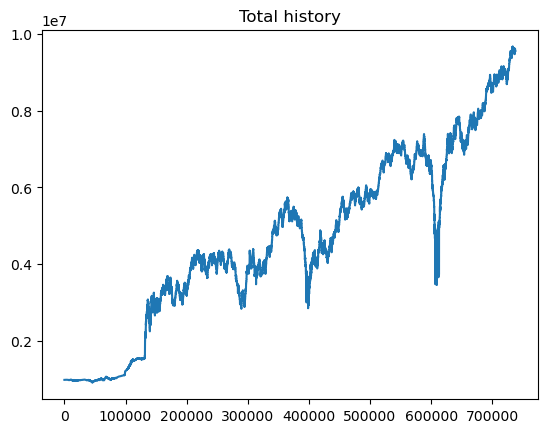

In [146]:
plt.title("Cash history")
plt.plot(ch)
plt.show()
plt.title("Pos history")
plt.plot(bh)
plt.show()
plt.title("Total history")
plt.plot(total)
plt.show()

In [147]:
# Trading strategy: 
cash = 500000 # 500 000 $
pos = 500000 / StartPriceBuy * (1-fee) # 500 000$ в BTC
fee = 0.000005
print("Trading final: ", total[-1], "% change: ", round((total[-1] - 2 * cash) / (2*cash), 4), "%")

Trading final:  9541903.07470125 % change:  8.5419 %


In [141]:
# Hold strategy: 
cash = 500000 # 500 000 $
pos = 500000 / StartPriceBuy * (1-fee) # 500 000$ в BTC
fee = 0.000005
print("Hold final: ", cash + pos * LastPriceSell, "% change: ", round((cash + pos * LastPriceSell - 2 * cash) / (2*cash), 4), "%")

Hold final:  980236.3758633032 % change:  -0.0198 %
